## Reading the data



Since we're trying to understand the fundamentals of Neural Networks.

For this lecture, we are taking a toy data instead of a Business Usecase.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 42.5MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


#### How many datapoints do we have ?

In [ ]:
df.shape

(300, 3)

#### Visualizing the data

The reason we have taken up this dataset is
- we can easily visualize it using 2D plots.

Let's plot this data in a scatter plot.

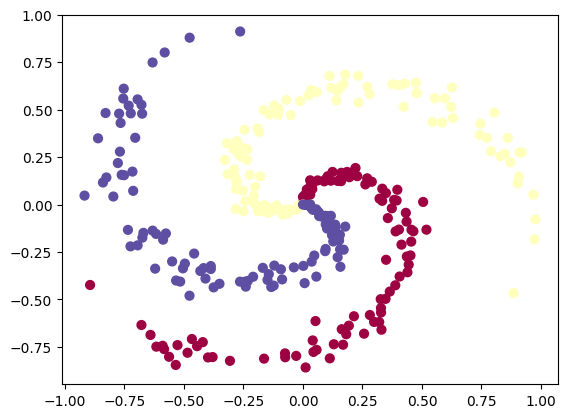

In [ ]:
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

---

We know we can train a simple Logistic Reg model using SGD and all, but

## How to train a NN?



Lets first define some variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 48.4MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
d = 2
n = 3

  
<hr style="border:1px solid gray"> </hr>
  
### Lets train this Softmax Classifier using Gradient Descent

Let's implement the process of training this model using the process we followed earlier


1. Initialise parameters: `W` and `b` matrices
2. Calculate the output using the hypothesis.
3. Calculate the error `J`
4. Repeat until `J` converges
 - update $w_i = w_i - lr* \frac{\partial J}{\partial w_i}$
 - calculate the output using hypothesis and updated params
 - calculate the error `J`


**Step 1**

#### Let's initialise the parameters

In [ ]:
# initialize parameters randomly
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))

**Step 2**

#### Forward propagation

#### Now, lets calculate the output using the hypothesis

We will break this is into three parts
1. calculate `z` using $XW$
2. Apply Softmax on `z`
 - Raising z to exponential $e^z$ => `exp_z`
 - Normalising

Let's compute the logits

In [ ]:
# compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape) # should be mXn = #examples X #output

(300, 3)


Lets raise these scores to base $e$, and normalise them to get probabilities

In [ ]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # explain why axis=1

In [ ]:
probs.shape

(300, 3)

**Step 3:**
#### Calculate the loss.
- Let's calculate **cross-entropy error**
 - It simplifies to taking log of predicted probability for the actual class
 - Why? Because the other terms will become $y_i*log(\hat{y}_i)$ terms will become zero on multiplying $y_i=0$
 - Lets calculate cross-entropy error for each sample, and call it `error`
 - The full loss is then the average of these log probabilities to compute the loss


In [ ]:
def loss(y, probs):
    m = y.shape[0]
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
loss(y, probs)

1.0996396683456613

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Backward propogation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

In [ ]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
d = 2
n = 3
m = y.shape[0]
# initialize parameters randomly
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))

In [ ]:
# compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape) # should be mXn = #examples X #output

Lets raise these scores to base $e$, and normalise them to get probabilities

In [ ]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # explain why axis=1

In [ ]:
probs.shape # probabilities of class

In [ ]:
dz = probs
dz[range(m),y] -= 1  # subtracting 1 from class where i == j as dz = pi - I
#dz = dz/m

$\frac{\partial z_i}{\partial w_i}$ is something we calculated earlier as well in LR, it will be equal to X.

Now, to calculate dW, we just need to multiply X with dz

In [ ]:
X.shape # shape (m, d)

In [ ]:
# shape (m, n ) as we have m samples and each sample has 3 class probab.
dz.shape

In [ ]:
# dW = dZ . X

dW = np.dot(X.T, dz) # check dimensions (2, 300) x (300 , 3) => (2, 3)
dW.shape

In [ ]:
b.shape # shape (1, n)

In [ ]:
db = np.sum(dz, axis=0, keepdims=True)
db.shape

In [ ]:
def backprop(probs, y):
    # we know that dz = pi - I
    dz = probs # dz = pi
    dz[range(m),y] -= 1 # subtacting 1 where i ==j i.e. class label matches
    dz = dz/m # taking average as we have m points
    dW = np.dot(X.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)
    return dW, db

Since, we are moving from right to left, to calculate the gradients, lets call it backproprogation

#### Once, we have the gradients, we will update the parameters

In [ ]:
lr = 0.1
W += -lr * dW
b += -lr * db

Lets put all this together in a class

In [ ]:
max_iters = 500
lr = 1

d = X.shape[1]
n = len(np.unique(y))
m = X.shape[0]
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

We have adapted the Logistic Regression model to work for mult-class setting.

Let's plot the decision boundaries

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

- We can see that the model has learnt three decision boundaries
- But since  haven't added any intermediate layer of neurons to create complex features, we don't expect the model to learn complex boundaries

#### Softmax Classifier code wrapped in a Python class

In [ ]:
class SoftmaxClassfier:
    def __init__(self, n_features, n_outputs):
        self.d = n_features
        self.n = n_outputs
        self.W = 0.01 * np.random.randn(d,n)
        self.b = np.zeros((1,n))
        self.loss = []

    def fwdprop(self, X):
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return probs

    def cce_loss(self, probs, y):
        m = y.shape[0]
        error = -np.log(probs[range(m), y])
        return np.sum(error)/m

    def backprop(self, probs, y):
        m = y.shape[0]
        dz = probs
        dz[range(m),y] -= 1
        dz = dz/m
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dW, db

    def fit(self, X, y, lr=0.1, max_iters=50):

        for i in range(max_iters):
            # evaluate the class probs
            probs = self.fwdprop(X)

            # compute the loss: average cross-entropy loss and regularization
            loss = self.cce_loss(probs, y)

            # compute the gradient on score
            dW, db = self.backprop(probs, y)

            # perform a parameter update using gradient descent
            self.W += -lr * dW
            self.b += -lr * db
            self.loss.append(loss)

        self.history = pd.DataFrame({
        'step': list(range(max_iters)),
        'loss': self.loss})

    def plot_loss(self):
        return self.history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

    def predict(self, X):
        probs = self.fwdprop(X)
        return np.argmax(probs, axis=1)

model = SoftmaxClassfier(n_features=2, n_outputs=3)
model.fit(X, y, lr=1, max_iters=500)
#model.plot_loss()
#print('training accuracy:', np.sum(model.predict(X) == y)/X.shape[0])

## MLP: Multi Layer Perceptron

## Forward Propagation

In [ ]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

Let;s intitialise these matrices randomly.

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

#### Calculation Z2 and A2

Now, in order to get shape of (300,3)
- we need to multiply $A^1$ with $W^2$ and add bias $b^2$ to it


In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

In [ ]:
probs.shape

(300, 3)

## Backpropagation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 27.4MB/s]


### Forward Propagation

Now, we need to calculate $Z^2$,
- for this we multiply each row of X with each column of W1
- add bias to it (using broadcasting)


The formulation comes out to be:

$$X.W + b$$

In [ ]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

Let;s intitialise these matrices randomly.

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

#### Calculation Z2 and A2

Now, in order to get shape of (300,3)
- we need to multiply $A^1$ with $W^2$ and add bias $b^2$ to it


In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

- Notice that the only change from before is one extra line of code.
- We first compute the hidden layer representation and considered that as an input to the output layer.

In [ ]:
# Number of training examples
m = y.shape[0] # 300 datapoints

In [ ]:
dZ2 = probs
dZ2[range(m),y] -= 1

In [ ]:
# shape A1 => (300,4)  shape dZ2 (equal to probability)=> (300,3)
dW2 = np.dot(A1.T, dZ2)/m # shape => (4, 300) x (300, 3) => (4,3)

- So, we'll take the sum across the row

In [ ]:
db2 = np.sum(dZ2, axis=0, keepdims=True)/m # shape (1 ,3)

Now that, we have all the shapes
- $dZ^2$ = (300, 3)
- $W^2$ = (4,3)

We need a final shape of (300, 4)

So, we will have to
- multiply dZ2 with transpose of $W^2$
- (300, 3) x (3, 4) => (300, 4)

$$dA^1 = dZ^2.W^{2^{T}}$$

In [ ]:
dA1 = np.dot(dZ2, W2.T) # (300,3) x (3 , 4) => (300, 4)

In [ ]:
dA1[Z1 <= 0] = 0 # was dA1[A1 <= 0] = 0. changed it to dA1[Z1 <= 0] = 0
dZ1 = dA1 # same shape as dA1 (300, 4)

$$ \frac{∂L}{∂b^1} = \frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂A^1}{∂Z^1}.\frac{∂Z^1}{∂b^1}$$

We know that,

$$\frac{∂L}{∂A^2}.\frac{∂A^2}{∂Z^2}.\frac{∂Z^2}{∂A^1}.\frac{∂Z^1}{∂A^1} = dZ^1 $$


We have to calculate $\frac{∂Z^1}{∂b^1}$

$$\frac{∂Z^1}{∂b^1} = \frac{∂(W^1.X + b^1)}{∂b^1} = 1 $$


So,

$$ \frac{∂L}{∂b^1} = dZ^1.1$$

In [ ]:
dW1 = np.dot(X.T, dZ1)/m # (2, 300) x (300 ,4) => (2, 4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

Now that we've found these gradients, we update the weight and bias values as:-


In [ ]:
lr = 1e-0

In [ ]:
# perform a parameter update
W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2

This parameter updation is done untill it converges (error goes down).

Done! Let's put everything together.

In [ ]:
# initialize parameters randomly
d = 2
h = 100 # size of hidden layer
n = 3
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

# some hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = X.shape[0]

for i in range(10000):

    # forward prop
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + b2
    Z2 = np.exp(Z2)
    A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
    probs = A2

    # calc. loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) # regularization
    loss = data_loss + reg_loss # adding reg. to loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # backprop
    # compute the gradient on scores
    dZ2 = probs
    dZ2[range(num_examples),y] -= 1
    dZ2 /= num_examples

    # first backprop into parameters W2 and b2
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # next backprop into hidden layer, A1
    dA1 = np.dot(dZ2, W2.T)
    # backprop the ReLU non-linearity
    dA1[Z1 <= 0] = 0
    # finally into W,b
    dZ1 = dA1
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1

    # perform a parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2

iteration 0: loss 1.098661
iteration 1000: loss 0.340004
iteration 2000: loss 0.266893
iteration 3000: loss 0.256200
iteration 4000: loss 0.253119
iteration 5000: loss 0.252083
iteration 6000: loss 0.251621
iteration 7000: loss 0.251314
iteration 8000: loss 0.251100
iteration 9000: loss 0.250901


#### NN class - all code wrapped as class

In [ ]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098567
iteration 1000: loss 0.397011
iteration 2000: loss 0.266143
iteration 3000: loss 0.253787
iteration 4000: loss 0.252140
iteration 5000: loss 0.251514
iteration 6000: loss 0.251190
iteration 7000: loss 0.250905
iteration 8000: loss 0.250834
iteration 9000: loss 0.250677
training accuracy: 0.99


In [ ]:
from matplotlib import pyplot as plt

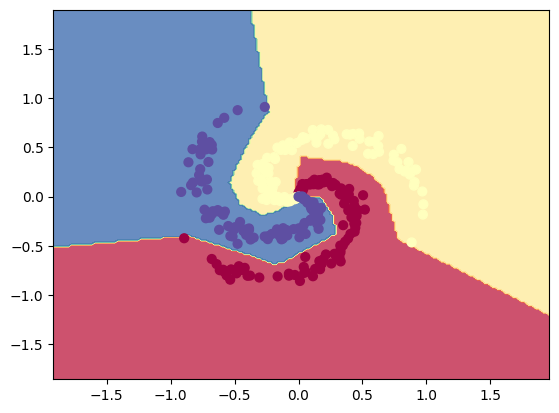

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

---

## Training a NN using sklearn - Multi layer perceptron (MLP)

As mentioned earlier, each unit of a NN is also called as perceptron, NN is called as MLP

sklearn MLPClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(100),
                    random_state=100,
                    activation='relu',
                    max_iter=200)
mlp.fit(X, y)
print(mlp.score(X, y))

0.9933333333333333


In [ ]:
len(mlp.coefs_)

2

In [ ]:
len(mlp.intercepts_)

2

In [ ]:
mlp.loss_

0.012061771596620623

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Business-use case


#### You are a Data Scientist working for Healthyfi.me

Healthyfi.me has labelled it's customers based on the highest intensity of work they could perform - A, B, C and D

#### Task: Given a new customer, help Healthyfi.me in recommending  customised workout plans by predicting customer's class




## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

- Lets first download the HealthyfiMe dataset.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2023-10-18 07:45:36--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 142.251.172.102, 142.251.172.139, 142.251.172.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.172.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sbnq5p2bu6hiq44n5cckfaibddmoe5sl/1697615100000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=450fb57c-4305-4cbc-b49d-610c4fc64b6c [following]
--2023-10-18 07:45:37--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sbnq5p2bu6hiq44n5cckfaibddmoe5sl/1697615100000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=450fb57c-4305-4cbc-b49d-610c4fc64b6c
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 74.125.124.132, 2

In [ ]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


**From the above snippet of data, we can have the following observations:**
- Data has an age column which is definitely required because we need to know what the person's age is in order to predict the class of highest intensity of workout.
- Data has features like 'gender', 'height', 'weight', 'diastolic', etc which we need to know before predicting the workout intensity because think about it we can not predict high intensity workout for a candidate with high blood pressure.
- And in the end there is a class variable where the intensity of workout is encoded to A, B, C and D

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


## EDA



- Gender has two levels, and class have 4 levels.
- We can easily convert `Gender` to 0/1 labels.
- Since `class` variable is ordinal, we can also replace it with 0, 1, 2, 3. - Can easily use NN.

In [ ]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


We can also change the name of the classes to numbers, will be easier for us to look at correlations

In [ ]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


- We are firstly mapping all the strings to integers in a reversed manner i.e. D is mapped to 0 and A is mapped to 3.
- Then we are replacing all the values in the `class` feature using replace() function and the dictionary we got from the mapping step.

Lets check if there are linear relations across the data

<Axes: >

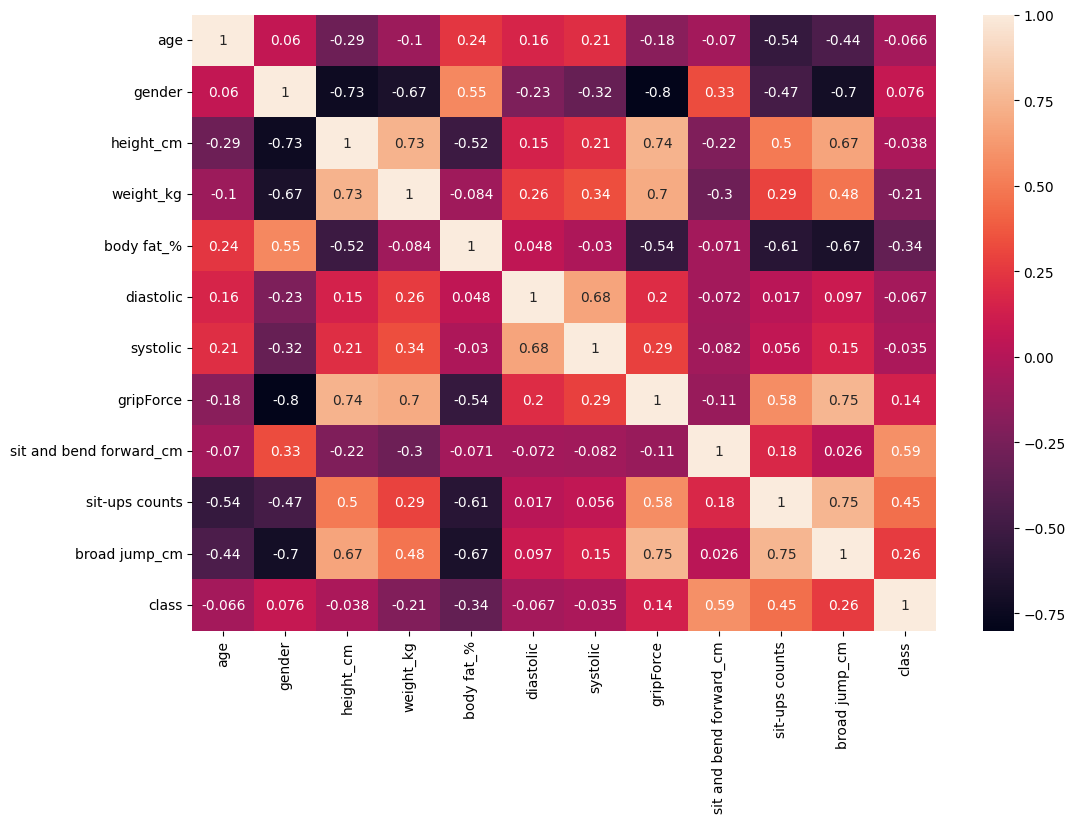

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

There are no strong linear relationships with `class` variables, which means, there is non-linear relation between `class` and the other variables.

We need to have an understanding of the range and distributions of all the variables. Which plot do you think will be hepful here?


Boxplot

<Axes: >

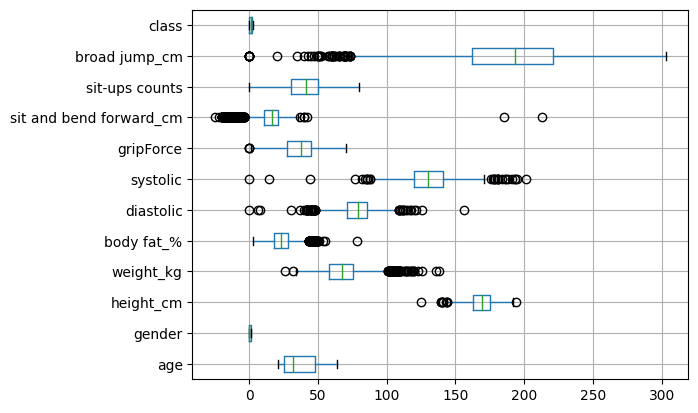

In [ ]:
df.boxplot(rot = 0, vert=False)

The distribution and range of all the features is quite different.

Let's have the independent and dependent variables separated into X and y.

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


Now we need to split the data for training and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


We have firstly splitted the dataset into dev and test data and then the dev data is further splitted into train and validation data.

Now that our data is prepared to be used for training, lets build the model using Tensorflow

Generally when features are normalized, neural network training is often more efficient


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

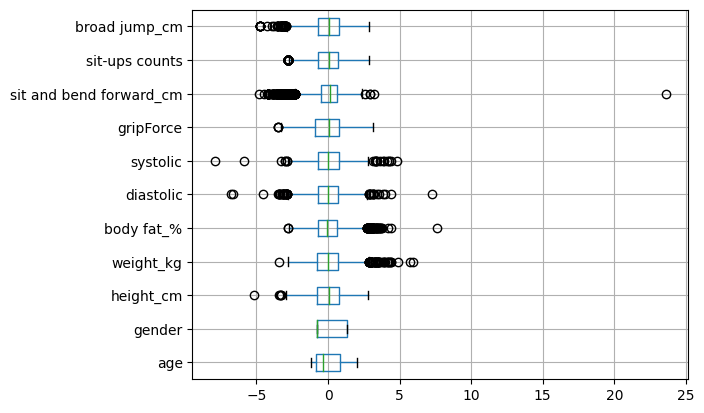

In [ ]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

Now that our data is prepared to be used for training, lets build the model using Tensorflow

Before, we get started, let's explore Tensorflow website a bit
-- --



## Tensorflow


- We will start-off directly with importing and checking it version.

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

- In TensorFlow 2, Keras has become the default high-level API for - TensorFlow.
- Because of Keras'es ability to write very simple code
- The complete keras API is now wrapped up as part of the TensorFlow installation and has become seamlessly integrated with TensorFlow.
- **You don't need to seperately install Keras now**.
- Even though it's the high-level API for TensorFlow, we'll be able to do most, if not all, of your model development using keras.
- If you want to do more complex stuff like designing your own activation function or any research work, you can do it using Tensorflow-2


There are two modules which we will start using right away.

### tf.keras Module

The first one is `tf.keras`, click on the module to see whats inside, or you can use the `dir()` function to get the list of contents as well.

In [ ]:
dir(tf.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'saving',
 'utils']

Let's look at the various activation functions available inside keras

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

### tf.data

- Other interesting module that we will use in further classes is `tf.data`
- We'll be looking at this further on in the course when we get to talking about **data pipelines**
- There, we will define our custom classes to load and pass different types of dataset like rows, images, text to NN as mini-batches

In [ ]:
dir(tf.data)

['AUTOTUNE',
 'Dataset',
 'DatasetSpec',
 'FixedLengthRecordDataset',
 'INFINITE_CARDINALITY',
 'Iterator',
 'IteratorSpec',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 'ThreadingOptions',
 'UNKNOWN_CARDINALITY',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

We can write code in keras using two ways:
- Sequential API
- Functional API

But for this lecture, we will talk about the most used keras Sequential API which will help us in most of the Deep NN that we will study in this course.

-- --

## Keras Sequential API


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- We will now create an instance (or object) of the Sequential class and call it `model`.
- Its same as creating an instance as we did using some sklearn's model class, just that, now we will now define the model as well.
- Sequential model will take a list of layers as an argument.

Lets define a feed forward network with a single hidden layer.

In [ ]:
model = Sequential([
                    Dense(64, activation="relu"), #hidden dense layer with 64 neuron units
                    Dense(4, activation="softmax") #output layer with 4 units and softmax activation
])

- The activation argument is optional, and if you don't pass it, it will be a linear (or no) activation

#### Question: Why do we need activation function?
- It provides non linearity to problems.

#### Question: Give an example of a case when we wouldn't like to pass an activation?

- Output layer of regression model

#### Question: If we want to find out if there is a method to check the weights of model, how will you find that method?

Use dir(model)

- From dir(model) we can find out about the weights() method for sequential models.

#### Lets check the model weights

In [ ]:
#model.weights # should give some error

Looks like the model hasn't created the weights yet.

#### Passing input shape

- Notice that we haven't told the model about the input size yet, and thus, tensorflow doesn't have any information to create W and b yet.
- Optionally, we can pass the input size right away as well in the first layer.

In [ ]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,)),
                    Dense(4, activation="softmax")
])

In [ ]:
type(model.weights)

list

In [ ]:
for param in model.weights:
  print(param.shape)

(11, 64)
(64,)
(64, 4)
(4,)


Lets look at another way to define the same model

#### model.add()

- Instead of passing the list of layers as an argument while creating a model instance, we can use the `add` method.

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(11,)))
model.add(Dense(4, activation="softmax"))

### Optional Exercise: What if the input had been a multi-dimensional data?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_2D = Sequential([
                    Flatten(input_shape=(28, 28)), # flatten the data to make it (784,) to be based further
                    Dense(64, activation="relu"),
                    Dense(4, activation="softmax")
])

Note: We can also directly pass multi-dimensional input directly for which we will study different types of networks like convolution neural network in later modules.

### Model summary

- There is another short way to check dimensions and parameters of each layer
- we can do it using the printing model summary

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Giving custom names to the layers

- As you can see in the model summary, keras has provided the names by itself.
- At times, we might want to give custom names to the layer as well

In [ ]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(4, activation="softmax", name="output")
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                768       
                                                                 
 output (Dense)              (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- We can also plot the model as a graph
- And save it as a png file

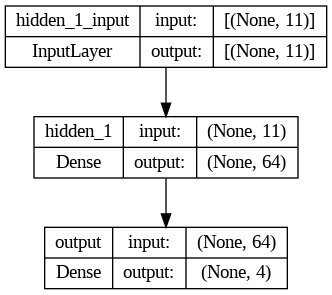

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

From the plot we can see that the first layer is the input layer and then the input and output shapes of each of layers `hidden_1` and `output` are given.

### Weights and Bias Initializer

- When we worked on NN from scratch, we intialised W with `np.random.rand` and b with `np.zeros`.
- We also learnt about various weight  initialization techniques
  - Glorot Normal
  
   $w^k_{ij} \sim N(0,\sigma_{ij})$, where $\sigma_{ij} = \frac{2}{fanin+fanout}$

  - Glorot Uniform
  
    $w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$
  - He Normal
    
    $N(0,\sigma)$, where $\sigma = \frac{2}{fanin}$

  - He uniform
  
   $Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$

- Now let see how keras implements them.
- The end results of the classification and regression gets affected by the initialization of the weights and biases.
- For now, we will just look at some methods of weights and bias initialization.




In Keras, in `Dense` layer,
1. the biases are set to zero (`zeros`) by default
2. the weights are set according to `glorot_uniform`, the Glorot uniform initialiser.


For example:
-  $$c = \frac{\sqrt{6}}{\sqrt{11+64}} = 0.28$$

for the first hidden layer of model as $fanin$ (input) is 11 and $fanout$(output) is 64


Note:

- There are several researches proposing different ways of randomly initialising the weights of the layers.
- But **`glorot_uniform` has been the most widely used** one in most of the Deep Learning frameworks today.


#### What if I want to initialise my own weights and bias? May be for my own research?

- Each layer has optional arguments `kernel_initialiser` and `bias_initialiser` to set the weights and biases respectively.

In [ ]:
model_X = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1", kernel_initializer='random_uniform', bias_initializer="zeros"),
                    Dense(4, activation="softmax", name="output", kernel_initializer='he_uniform', bias_initializer='ones')
])

We can totally go from scratch as well (only if we need to) using keras.initialiser submodule

In [ ]:
Dense(64, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
          bias_initializer=tf.keras.initializers.Constant(value=0.4),
          activation='relu')

- Let's try to retrieve the layers of the model.

In [ ]:
model.layers

- Lets look at how are they initialised, we can check how the weights distribution (optional).

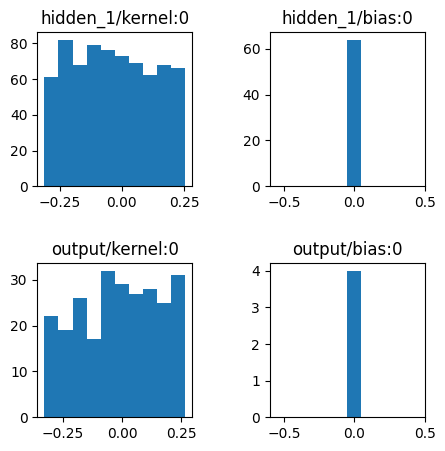

In [ ]:
# Plot histograms of weight and bias values
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

- layers() method consist of a list of layers.
- In the code, we are firstly getting all the weights and biases of the layers using `layer.weights[0/1]`, then converting them to a numpy array and then flattening all the arrays to just get an array of initialized weights and biases.
- From the above plots it can be observed that all the biases are intialized to zero by default.
-- --

## Compile - loss and optimizer



Until now, we have defined the model architecture.

After defining the model, we have to compile the model.

#### Question: What do you think, which specific information we should pass to model while compiling ?
1. Loss function - To measures the model performance as it trains
2. Optimizer (like Gradient Descent) - To performs the gradient update

We do this by using two arguments of the compile method `optimizer` and `loss`.

Lets take an example of a binary classification task here

In [ ]:
model_2C = Sequential([
          Dense(64, activation="relu", input_shape=(11,)),
          Dense(1, activation="sigmoid")])

# new piece of code
model_2C.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "binary_crossentropy", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = ["accuracy"]
)

- There are multiple options for optimisers, loss and metrics which we will discuss in detail later

- All these strings which we have passed as argument i.e. `sgd`, `binary_crossentropy` and `accuracy` are reference to some default objects defined in keras. They are called to string identifiers.
- We can also directly instantiate these custom objects here with the classes defined in keras submodules for example `opt = keras.optimizers.Adam(learning_rate=0.01)`
- We can even pass customized loss and optimizer functions in keras models.


#### Lets change the learning rate by initialising  a custom object

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
)

Optionally, we can define a list of metrics which we might want to track during the training, like accuracy

In [ ]:
model = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

Other available string identifiers to pass in `loss` parameter.

#### How sparse categorical crossentropy different from categorical cross-entropy?

1. Use `categorical_crossentropy` if target vector is one hot-encoded - [1,0,0,0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]
2. Use `sparse_categorical_crossentropy` if target vector is ordinal integer values - 0, 1, 2, 3

- We can use these objects when we need to change their arguments like a using different learning rate.
- We can change the cut-off from 0.5-0.7 or anything using this.
- These metrics will be calculated and saved after each epoch (one pass of whole data to update the model).

#### But what exactly is an epoch?
- When data is too big, data is passed in small batches instead of one big batch due to memory constraints. Each pass of mini-batch is called an iteration.
- Each pass of whole datasets is called an Epoch.

- One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.


Lets finally check if the loss and optimisers for the model are set. We can use the model attributes for getting these.

In [ ]:
model.loss

In [ ]:
model.optimizer

-- --
## Training the model using `fit` method

Training the model would mean updating the weights using the optimizer and loss functions on the dataset.



`model.fit(X_train, y_train)`

X_train = (num_samples, num_features)

y_train = (num_samples, num_classes) or y_train = (num_samples, )

Lets look at some other arguments of model.fit method

### Set the epochs

You might want to train the model for more than 1 epochs.

`model.fit(X_train, y_train, epochs=500)`

### Set the batch size

- Another option is to set the batch size, the default is 16.
- Usually, the batch size used are of the form $2^x$ - 4, 8, 16, 32, 64
- And we try to take as big of a bach size as GPU memory can manage.
- Setting up batch_size=16 means that 16 training samples are passed in single iteration.
- Num_iterations in an epoch = num_samples/batch_size

There are some other sophisticated arguments of `model.fit `which we will dicuss later as we progress.




Lets train our model! <br>

Here we have mentioned `validation_split = 0.1`, <br>
which means 10% of our training data will be used for validation  

- Seed in ML means intilization state of a pseudo random number generator.
- After setting the same seed whenever random() function is called we will get a specific way of generating numbers.
- If you use the same seed you will get exactly the same pattern of numbers during weights initializations, which will be helpful for us as if all of us run the code we will get the same output.

In [ ]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tf.random.set_seed(seed)


seed_everything()

Let's train for few epochs first and see what happens

In [ ]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val,y_val), verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/10
43/43 [==============================] - 1s 7ms/step - loss: 1.4167 - accuracy: 0.2478 - val_loss: 1.3760 - val_accuracy: 0.3076
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 1.3473 - accuracy: 0.3408 - val_loss: 1.3173 - val_accuracy: 0.4104
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 1.2821 - accuracy: 0.4255 - val_loss: 1.2364 - val_accuracy: 0.4536
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 1.2012 - accuracy: 0.4622 - val_loss: 1.1440 - val_accuracy: 0.4925
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 1.1185 - accuracy: 0.4934 - val_loss: 1.0566 - val_accuracy: 0.5133
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 1.0448 - accuracy: 0.5331 - val_loss: 0.9800 - val_accuracy: 0.5531
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.9853 - accuracy: 0.5651 - val_loss: 0.9227 - val_accuracy: 0.5904
Epoch 8/10
43/43 [==

**Observe**
- Here we trained our model for 10 epochs
- `model.fit` is printing all the metrics like accuracy, loss, validation loss, validation accuracy etc.

#### Question: How can we use all this information and use it for analyising training process ?
- For this let's check what this `model.fit` is returning

### History

- `model.fit` returns a history object which contains the record of progress NN training.
- History object contains records of loss and metrics values for each epoch.
- History object is an example of something called "callback" (will study it later).

### Compiling and training the model
- Until now, we  have seen how to build a NN model, compile it with relevant loss function, optimizer and metrics to track while training.
- We also saw how we can train the model using the fit method for certain number of epochs and with certain batch_size.

Let's train model for 500 epochs and store training process inside a variable called **history**

In [ ]:
%%time
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.1, verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/500
39/39 [==============================] - 0s 4ms/step - loss: 0.8827 - accuracy: 0.6119 - val_loss: 0.8846 - val_accuracy: 0.6120
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.6166 - val_loss: 0.8769 - val_accuracy: 0.6092
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.6198 - val_loss: 0.8727 - val_accuracy: 0.6120
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.6207 - val_loss: 0.8651 - val_accuracy: 0.6175
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.6230 - val_loss: 0.8617 - val_accuracy: 0.6276
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.6273 - val_loss: 0.8562 - val_accuracy: 0.6249
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.6298 - val_loss: 0.8554 - val_accuracy: 0.6240
Epoch 8/500
3

- Lets try to plot histograms of model weights and baises to see if there is any difference after training
- **[Q] What will be the distributions now? Still glorot_uniform ?**

  - Weights now follow normal distribution
  - Biases are not Zero now


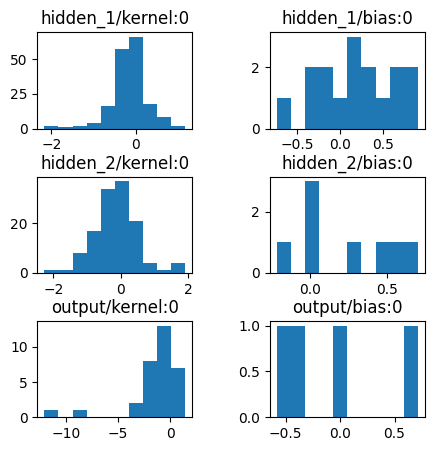

In [ ]:
# Plot histograms of weight and bias values after training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

***Question:*** Is one iteration / step is one forward and then one back propagation?

***Answer:***
- Yes, that is correct.

### `validation_data`

- We can also explicitly use a validation set (which was earlier created while splitting the data) using `validation_data` argument in `fit` method.
- But, we will have to re-initialise the model after defining with `validation_data`, else, the model will start getting trained from its current stage.
- Ideally, we should have written this code as a function, so that we don't have to write model definition again and again


In [ ]:
def create_model():
    model = Sequential([
                    Dense(32, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
    return model

model = create_model()

Also, this time, lets change the `verbose=0` to make the training process silent. This will prevent the printing of loss and other metrics for each epoch.

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=500, batch_size=512, verbose=0)

Lets look at the history object dictionary. It's an alternative to dir().
`__dict__` attribute can be used to retrieve all the keys associated with the object on which it is called.

In [ ]:
history.__dict__.keys()

We can see that history object's dictionary has another dictionary with key "history" inside it

We can also call the `history` method of the above object as it is available in keys associated with the `model.fit()`.

In [ ]:
history.history.keys()

model.fit() has saved all the loss and metrics values  for each epoch inside the `history` dictionary where all the values are stored in different lists.

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

Lets plot the loss and accuracy curves for both training and validation data

In [ ]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

- We can see that both training and validation loss decrease with epochs.
- After around 120 epochs, training loss still keeps on decreasing, but validation loss starts to increase.
- This means, **the model starts overfitting the training dataset after 120 epochs**.
- Params learnt after 120 epochs would be the one which are overfitting the training dataset.
- Later, **we will see ways to save intermediate model parameters** - **early stopping**.
- But for now, lets evaluate the model performance based on 500 epochs trained model only.
-- --


## Keras Functional API



In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model_sequential = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

- Earlier we have created this model using Sequential API
- Now lets create same model using Functional API

In [ ]:
from tensorflow.keras.layers import Input

- In Sequential we passed input shape in the first layer
- But Here we will be using an additional layer : **Input layer**
- we're going to explicitly have a separate layer to represent the data input.

- Another main diference is `tf.keras.models.Model`
- Here instead of Sequential, here **we will be using Model Class**

### Keras Functional Model Class

- First we create an input layer with the shape of the dataframe

In [ ]:
inp1 = Input(shape=(11,))
inp2=Input(shape=(5,))

- Next we will be creating our first two layer of the model
- Instead of creating a list (as in Sequential)
- We will also pass previous layer in the current layer
- In first dense `hidden_1` we will pass `inp`
- And in second `hidden_1` we will pass `hidden_2`

In [ ]:
h1 = Dense(16, activation="relu", name="hidden_1")(inp)
h2 = Dense(4, activation="relu", name="hidden_2")(h1)
h3=Dense(4,activation="tanh" name="hidden_3")(inp2)

- Now we will create the final output layer

In [ ]:
out1 = Dense(4, activation="softmax", name="output")(h2)
out2=Dense(1, name="output")(h3)

- We have defined the flow of the model
- Finally,  to built a model using this directed graph
- We will use `tf.keras.models.Model`, and pass all the inputs and outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model_functional = Model(inputs=[inp1,inp2], outputs=[out1,out2], name="simple_nn")

Let's generalize above code inside a function

In [ ]:
def create_model_functional():

  inp = Input(shape=(11,))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)

  out = Dense(4, activation="softmax", name="output")(h2)

  model = Model(inputs=inp, outputs=out, name="simple_nn")
  return model

In [ ]:
model_functional = create_model_functional()

In [ ]:
model_functional.summary()

In [ ]:
#And, optionally, display the input and output shapes of each layer in the plotted graph:

tf.keras.utils.plot_model(model_functional,show_shapes=True)

In [ ]:
# let's create a little complex model using functional API's with more than one output

def create_model_multiple_output():
  inp = Input(shape=(11,))

  h1 = Dense(16, activation="relu", name="hidden_1")(inp)
  h2 = Dense(8 , activation="relu", name="hidden_2")(h1)
  h3 = Dense(4 , activation="relu", name="hidden_3")(h2)

  out1 = Dense(1, activation="sigmoid", name="output1")(h3)
  out2 = Dense(1, activation="relu", name="output2")(h3)

  model = Model(inputs=inp, outputs=[out1,out2], name="simple_nn")
  return model

# creating model with multiple output
model_multiple_output = create_model_multiple_output()
model_multiple_output.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])

# plotting model with multiple output
tf.keras.utils.plot_model(model_multiple_output,show_shapes=True)

## Prediction and Evaluation



Lets evaluate the model performance on different sets, we will carry out all predictions using the model created via sequential API

### Evaluate the model

`model.evaluate(X_test, y_test)`

- model.evaluate **returns the loss value & metrics value** for the model.
- It is important to note that, **weights/parameters are not updated during evaluation** (and prediction)
- This also means - **only forward pass, no backward pass**

Now lets evalute our models on training, validation and testing datasets

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Set')
print("Loss value : ", loss)
print("Accuracy   : ", accuracy)

### Predictions

- If we need to get the prediction for an **unseen data**, we can use the `predict` method to get the predictions.
`model.predict(X_test)`

- It **returns raw output** from the model (i.e. **probabilities** of an observation belong to each one of the 4 class)

In [ ]:
pred = model.predict(X_test)
pred


####What will be the sum of probabilities of an observation belong to each of the 4 classes?
- 1

- As the model outputs the probabilities for all the observations and each observation can only belong to one of these 4 classes, therefore the sum of probs will be 1.

In [ ]:
np.sum(pred, axis=1)

#### How can we know the class an observation belongs to, using these 4 probability values?
We can find the index having the largest probability and that will be the predicted class.

In [ ]:
pred_class = np.argmax(pred, axis = 1)
pred_class

Now, to cross-check, we will again check accuracy of the model using sklearn's `accuracy_score`.

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, pred_class)

print("Test acc: ", acc_score)

-- --
## Callbacks



Earlier, we saw

- with verbose=1, model training prints associated data after every epoch
- with verbose=0, model training prints nothing

#### What if we want to customise the printing behaviour?

Let's use something called **callbacks** to do this.

#### But, first what are callbacks?

A callback **defines a set of functions** which are **excuted at different stages of the training** procedure. <br>
For example: A callback function may run
1. function `on_epoch_begin` before every epoch
2. function `on_epoch_end` after every epoch
and such multiple functions.

#### How can these callbacks be useful?

They can be **used to view internal states of the model** during training.

- For example, we may **want to print loss, accuracy or lr every 2000th epoch**.
- For this, may be we can **add a condition like `if epoch%2000==0`** then only do certain task, example, printing loss, accuracy or lr

Lets create our own customized callback class for printing Loss and Acc for every 50th epoch

- The custom class will inherit from `tf.keras.callbacks.Callback`.
- Which means that all the attributes and methods available in the keras.callbacks.callback class will be available for our customized class, and we can also override them.

In [ ]:
class VerboseCallback(tf.keras.callbacks.Callback):
  # runs only before the training starts
  def on_train_begin(self, logs=None):
        print("Starting training...")

  # runs after every epoch
  def on_epoch_end(self, epoch, logs = None):
    if epoch % 50 == 0:
       print(f'Epoch {str(epoch).zfill(3)}', '- loss : ', logs['loss'], '- Acc : ', logs['accuracy'])

  # runs once training is finished
  def on_train_end(self, logs=None):
        print("...Finished training")

In the above code snippet we are printing a sentence at the start of training and also printing the loss and accuracy for each 50th epoch's end. We are also printing a sentence at the end of training.
- In the code snippet `logs` is the dictionary that callback methods take as an argument that will consist of the keys for quantities relevant to the current batch or epoch like loss, accuracy etc.

- We will have to **pass a list of callback objects** to `callbacks` argument  of the fit method
- (Optional) We **can pass callback objects to evaluate and predict** method as well.

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.1, verbose=0, callbacks=[VerboseCallback()])

The parent class `tf.keras.callbacks.Callback` supports various kinds of methods which we can override

-  Global methods  <br>
   at the beginning/ending of training <br>

- Batch-level method  <br>
 at the beginning/ending of  a batch <br>

- Epoch-level method  <br>
 at the beginning/ending of an epoch <br>


  Example -
  ```
class TrainingCallback(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")

    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}, loss is {logs['loss']}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}, loss is {logs['loss']}, accuracy is {logs['accuracy']}")
        
    def on_train_end(self, logs=None):
        print("Finished training")

  ```


- There are some pre-defined callback classes such as CSVLogger, EarlyStopping, LearningRateScheduler.
- They can be useful for various tasks e.g..., EarlyStopping can be used to stop the training as soon as the validation loss starts to increase.

Other examples include:
1. CSVLogger - save history object in a csv file `csv_logger = keras.callbacks.CSVLogger("file_name.csv")
`
2. EarlyStopping - stop the training when model starts to overfit
3. ModelCheckpoint - saves the intermediate model weights
4. LearningRateScheduler - control/change Learning Rate in between epochs

we will use them in the later lectures

So far we have learnt about the following steps for using a model:
1. Defining a model.
2. Compiling the model using `model.compile()` with `loss` and `optimizers`
3. Training the model with `model.fit()`.
4. Predicting using a model through `model.predict()`.
5. Evaluating the performance using `model.evalulate()`.
6. Using callbacks for performing certain tasks during different stages of training process.

-- --

## Tensorboard


- It is always a **good practice to closely monitor the training process** - changes in the loss, performance, changes in the parameters.
- We do get the values of these attributes using `history` but we need to explicitly plot them to visualize.
- Lets learn about a **handy tool which we can use to visually track metrics, weights**


Tensorboard is a dashboard that allows us to visualise information regarding the training process like
- Metrics - loss, accuracy
- Visualise the model graphs
- Histograms of W, b, or other tensors as they change during training - distributions
- Displaying images, text, and audio data (in later lectures)

### Start Tensorboard

- We **don't need to install** tensorboard in **colab**.
- Else, we can do that using one of the possibilities

```
pip install tensorboard
conda install -c conda-forge tensorboard

```
We will directly load the Tensorboard to Colab.

Load tensorboard in the notebook.

In [ ]:
%load_ext tensorboard

- Now we have have to set a log directory, say `logs`


In [ ]:
log_folder = 'logs'

- TensorBoard will **store all the logs in this log directory**.
- It will read from these logs in order to display the various visualizations.
- If we want to reload the TensorBoard extension, we can use the reload magic method

In [ ]:
%reload_ext tensorboard

- Before saving the new logs to the folder, we might want to clear the current logs (if there are any).


In [ ]:
!rm -rf logs

Inorder to use Tensorboard, we need to import `tf.keras.callbacks.TensorBoard`

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

Callback arguments:
- **log_dir** - (Path)
 - directory where logs will be saved
 - This directory should not be used by any other callbacks.

- **update_freq** - (int/str)
 - how frequently losses/metrics are updated.
 - when set to  `batch`, lossess/ metrics will be updated after every batch/iteration
 - when set to an integer `N`, updation will be done after `N` batches
 - when set to 'epoch', updation will be done after every epoch

- **histogram_freq** - (int)
 - how frequently (in epochs)  histograms(Distribution of W) will be updated.
 - Setting this to 0 means, histograms will not be computed.
-**write_graph**   - (Bool), `True` if we want to visualize our training process
-**write_images** - (Bool), `True` if we want to visualize our model weights

In [ ]:
tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Now we will train our model again. <br>
This time using Tensorboard callback

In [ ]:
model = create_model()
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data = (X_val, y_val), verbose=0, callbacks=[tb_callback])

Let us now look at the various tabs on the TensorBoard dashboard.

- **Scalars**:  shows loss and metrics
- **Graphs** :  shows model training structure
- **distributions** : distribution of W & b
- **histograms** : histogram of W & b over epoch


Launch tensorboard using the following command line.

In [ ]:
%tensorboard --logdir={log_folder}

#**Business Case**

You are working at **24Seven**, which has different stores buying various products. Based on the purchase history :
- you want to divide the stores into classes for better inventory management and customer handling.



Lets now load the data


In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 19.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|


In [ ]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 440 | 8 |

In [ ]:
df.shape

(440, 8)

#EDA


Converting ```Region``` a **Categorical data** to  ```One Hot Encoding``` matrix



In [ ]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [ ]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

Visualizing the data using PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


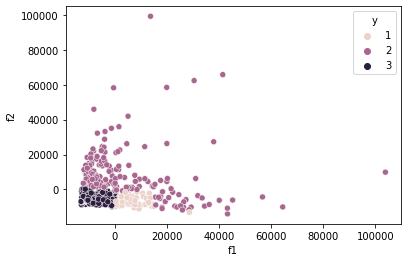

In [ ]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observe**

The data is non-linear, hence to correctly classify the data:
- We will require a deep Neural Network


Splitting Data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Now that the data is ready, we can implement
- A NN model using [tensorflow keras](https://keras.io/api/)
- By creating 7 layered NN such that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 32 Neurons|
|**L3**| |Contains 64 Neurons|
|**L4**| |Contains 128 Neurons|
|**L5**| |Contains 64 Neurons |
|**L6**| |Contains 32 Neurons|
|**L7**| |Is the Output Layer |
<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(3,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
3/3 [==============================] - 2s 91ms/step - loss: 1.1166 - val_loss: 1.1014
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1109 - val_loss: 1.0949
Epoch 3/10
3/3 [==============================] - 0s 11ms/step - loss: 1.1055 - val_loss: 1.0883
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 1.1004 - val_loss: 1.0820
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0955 - val_loss: 1.0762
Epoch 6/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0910 - val_loss: 1.0706
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 1.0865 - val_loss: 1.0650
Epoch 8/10
3/3 [==============================] - 0s 12ms/step - loss: 1.0822 - val_loss: 1.0598
Epoch 9/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0780 - val_loss: 1.0547
Epoch 10/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0739 - val_loss: 1.0497


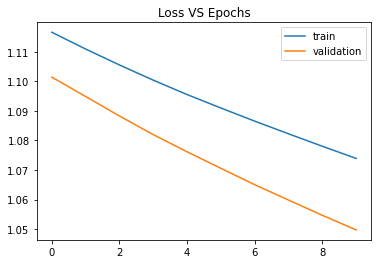

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

After 10 epochs the model still has a very high loss

<br>

#### What should be done to make the model perform better ?

Ans: increase the training epochs of the model

Lets now increase the epoch of model to 200

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128, verbose = 0)


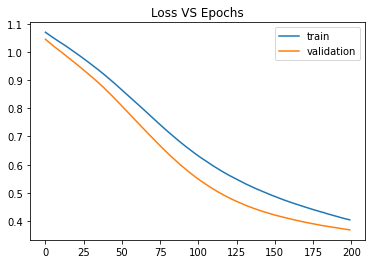

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

The model requires 210 epochs:
- For it to have such a low loss

Now imagine if the dataset has 5 million samples:
- The model will require a very high training epoch
- in order for it to reach global minima

This surely will be a huge drawback:
- While deploying the model

Lets now implement Gradient Descent with momentum on our model

In [ ]:
model_gdm = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


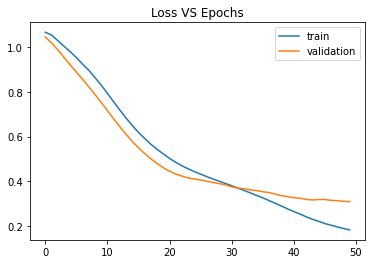

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Just by using Momentum with Gradient Descent:
- The model was able to perform so much better in just 25 epochs



Implementing RMSProp

In [ ]:
model_rms = create_baseline()

Using ```RMSprop``` as Optimizer

In [ ]:
model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy())


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_rms.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


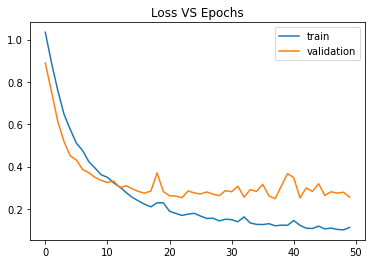

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Though RMSProp reaches minima within 10 training epochs:
- we see a lot of oscillations than Gradient Descent with momentum
- meaning the optimizer still takes steps in the direction not to the global minima


Implementing Adam

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0,callbcaks=[,])


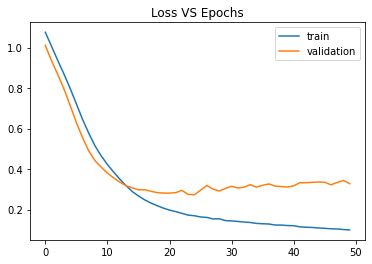

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

defining the Learning Rate decay

In [ ]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [ ]:
LRdecay = LearningRateScheduler(scheduler)

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecays], verbose = 0)


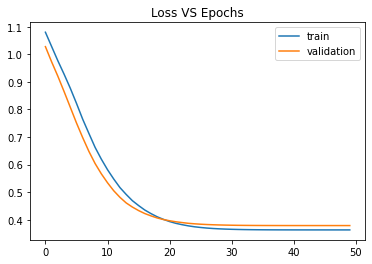

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

How by using Learning Rate decay,
- the model reaches a loss of around 0.3 now
- Showing that reducing the Learning Rate did help improve model performance




#Business Case

**Amazon** is facing a high surge of returns on some of its Products, which has led to the downgrade of the company credibility.

So they have appointed you as their Data Scientist:
- To estimate whether customer will return the product or not
- based on the product description, transportation, importance and prices

With this, lets load the data:

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def create_baseline():

  model = Sequential([
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1 , activation = 'sigmoid')])
  return model

model = create_baseline()

def custom_mse(y_true, y_pred):
  loss = np.square(y_pred - y_true)
  loss = loss * [0.5, 0.5]            #x
  loss = np.sum(loss, axis=0)          #y
  return loss

model.compile(loss=custom_mse, optimizer='adam')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!gdown 1mMRZKe5Qm99fJBE9y0mLdvVZYDfHvkxY

df = pd.read_csv('Amazon.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1mMRZKe5Qm99fJBE9y0mLdvVZYDfHvkxY
To: /content/Amazon.csv
100% 429k/429k [00:00<00:00, 154MB/s]


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of Customers|
|02| **Warehouse_block** | The Company have big Warehouses which is divided in to block such as A,B,C,D,E|
|03|**Mode_of_Shipment**|The Company Ships the products in multiple way such as Ship, Flight and Road.|
|04|**Customer_care_calls**|The number of calls made from enquiry for enquiry of the shipment|
|05|**Customer_rating**| The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|06|**Cost_of_the_Product**|Price of the Product|
|07|**Prior_purchases**|The Number of Prior Purchases of the customer|
|08|**Product_importance**|The company has categorized the product in the various parameter such as low, medium, high.|
|09|**Gender**|If Customer is a Male or Female|
|10|**Discount_offered**|Discount offered on that specific product|
|11|**Weight_in_gms**|It is the weight in grams|
|12|**Returned**|It is the target variable, where 1 Indicates that the product is returned|


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 10999 | 12 |

In [ ]:
df.shape

(10999, 12)

In [ ]:
X = df.drop(columns=['ID','Returned'])
y = df['Returned']

Splitting the data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (7039, 10) (7039,)
Validation: (1760, 10) (1760,)
Test  :  (2200, 10) (2200,)


#EDA


In [ ]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder


Converting all the Categorical Features to Numerical
- using TargetEncoding

In [ ]:
enc = TargetEncoder(cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])
X_train = enc.fit_transform(X_train, y_train)

X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
10286,0.578005,0.608167,6,2,196,2,0.600878,0.596148,10,5180
7746,0.600336,0.600251,4,3,228,5,0.600878,0.599487,9,1044
1789,0.601109,0.608167,5,2,231,4,0.586928,0.596148,41,2992
2521,0.601109,0.600251,6,4,221,10,0.586928,0.596148,42,2972
10404,0.600336,0.576471,5,3,243,6,0.600878,0.599487,1,1856


#Standardization

**Observe**
- How the data is not Standardized

<br>

Lets Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Baseline Model

Now that the data is ready, we can implement
- A simple NN model using [tensorflow keras](https://keras.io/api/)
- By creating 5 layered NN such that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 256 Neurons|
|**L3**| |Contains 128 Neurons|
|**L4**| |Contains 64 Neurons|
|**L5**| |Is the Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1 , activation = 'sigmoid')])
  return model

#### What Loss to use when the final layer Neuron output $(\hat{y} = a^5_1) \in [0,1] $ while $y \in$ { $0,1$ } ?

Ans: Recall from Logisitic Regression:
- when Sigmoid $σ(z) \in (0,1)$ and $y = \in $ {$0,1$}
- LogLoss was used. $Logloss (L) = -y  \times log(\hat{y}) - (1-y) \times log(1-\hat{y}) $

Hence here too, LogLoss can be used.

<br>

**Note:** Logloss in Tensorflow Keras is implemented using ```BinaryCrossentropy()```




In [ ]:
model = create_baseline()

Using ```Adam``` as Optimizer and metric being ```Accuracy```

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


Loading Tensorboard

In [ ]:
%load_ext tensorboard

from datetime import datetime
now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"


Clearing any running logs

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128, verbose=1,callbacks=[tb_callback])


Epoch 1/10
55/55 [==============================] - 6s 11ms/step - loss: 0.5620 - accuracy: 0.6446 - val_loss: 0.5511 - val_accuracy: 0.6307
Epoch 2/10
55/55 [==============================] - 0s 5ms/step - loss: 0.5167 - accuracy: 0.6748 - val_loss: 0.5509 - val_accuracy: 0.6403
Epoch 3/10
55/55 [==============================] - 0s 6ms/step - loss: 0.5145 - accuracy: 0.6782 - val_loss: 0.5457 - val_accuracy: 0.6375
Epoch 4/10
55/55 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.6821 - val_loss: 0.5434 - val_accuracy: 0.6403
Epoch 5/10
55/55 [==============================] - 0s 6ms/step - loss: 0.5057 - accuracy: 0.6860 - val_loss: 0.5432 - val_accuracy: 0.6381
Epoch 6/10
55/55 [==============================] - 0s 6ms/step - loss: 0.5015 - accuracy: 0.6953 - val_loss: 0.5455 - val_accuracy: 0.6420
Epoch 7/10
55/55 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.6974 - val_loss: 0.5487 - val_accuracy: 0.6358
Epoch 8/10
55/55 [=

Lets check the Model performance on Training and Validation data

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 0.4854 - accuracy: 0.7120


[0.4853939414024353, 0.7120329737663269]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.6403


[0.5485544800758362, 0.6403409242630005]

Lets plot the Accuracy vs Epochs plots for both training and Validation
- for better clarity

In [ ]:
%tensorboard --logdir={log_folder}

**Observe**

The model has:
- training accuracy : 69.9%
- and Validation accuracy : 64%

<br>

#### What can we understand from model's  training accracy being 69.9% and Validaiton Accuracy being 64% ?

Ans: Clearly, the model overfits the data meaning:
- Model has a low Bias
- But a High Variance

<br>

#### How can we make the baseline model not Overfit ?
Ans: By using Regularization


# Regularization

Lets now implement  L2 Regularization on the Baseline Model  

In [ ]:
def create_baseline():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, activation="relu", kernel_regularizer = L2Reg ),
                    Dense(128, activation="relu", kernel_regularizer = L2Reg),
                    Dense(64, activation="relu", kernel_regularizer = L2Reg),
                    Dense(1 , activation = 'sigmoid')])
    return model

In [ ]:
model = create_baseline()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


Loading Tensorboard

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128, verbose=0,callbacks=[tb_callback])

Evaluating the model

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
%tensorboard --logdir={log_folder}

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-10-21 16:39:40.683549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

**Observe**

Even with L2 Regularization:
- the model performance didnot improve drastically



#Dropout

In [ ]:
from tensorflow.keras.layers import Dropout
def create_Dropout():
    # lambda = 0.01
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, activation="relu", kernel_regularizer = L2Reg ),
                    Dropout(0.3),
                    Dense(128, activation="relu", kernel_regularizer = L2Reg),
                    Dropout(0.3),
                    Dense(64, activation="relu", kernel_regularizer = L2Reg),
                    Dense(1 , activation = 'sigmoid')])
    return model

In [ ]:
model = create_Dropout()

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])


In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Training the model

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Evaluating the model

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 0.7068 - accuracy: 0.4167


[0.7068008184432983, 0.4166785180568695]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.4290


[0.7056871056556702, 0.42897728085517883]

In [ ]:
%tensorboard --logdir={log_folder}

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-10-21 16:39:47.686408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

**Observe**

using Dropout and Regularization,
- the model did reduce its overfitting

# Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

def create_BatchNormalization_model():
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dropout(0.2),
                    Dense(128, kernel_regularizer = L2Reg),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(64,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(1)])
    return model

In [ ]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),x
                metrics=["accuracy"])

SyntaxError: ignored

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Increasing epoch to 15 now

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0,callbacks=[tb_callback])


Evaluting the model

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
%tensorboard --logdir={log_folder}

We see after applying Batch Normalization :
- L2 Regularization worked
- And made the model not overfit the data  

# Early Stopping

In [ ]:
model = create_BatchNormalization_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [ ]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50,  restore_best_weights=True)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_accuracy',
                                                             save_best_only=True,
                                                             mode='max')

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0, callbacks=[EarlyStoppingCallback, ModelCheckpointCallback,tb_callback])


In [ ]:
%tensorboard --logdir={log_folder}

Loading the model where the EarlyStopping took place

In [ ]:
model = create_BatchNormalization_model()
model.build(input_shape =(None,10))

In [ ]:
model.load_weights('tf_model.h5')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
output = model.predict(X_test)

As```output``` is just the probability of $Y=1$ or $Y=0$ based on the feature X,
- Using a threshold $ γ = 0.5 $ so that ```output``` $\in ${$0,1$}

In [ ]:
y_pred = np.array([1 if i > 0.5 else 0  for i in output])

Plotting Confusion Matrix

In [ ]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()

class_names = ['Returned','Not Returned']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix.
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Use white text if squares are dark; otherwise black.
threshold = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color =  "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


**Observe**

Though the model performs pretty good , it still has a significantly **high False Positive**:
- Showing that maybe a more complex model might be needed to for a better performance

Plotting ROC Curve

In [ ]:
fpr,tpr,_ = sklearn.metrics.roc_curve(y_test,output.squeeze(axis=1))

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

**observe**

Clearly the model outperforms a mean model

#### Code walkthrough - Dimensionality-Reduction (using AE)

In [ ]:

#Source and Reference: https://blog.keras.io/building-autoencoders-in-keras.html


import keras
from keras import layers
from keras.datasets import mnist
import numpy as np



(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalization of input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
#AutoEncoder model - Functional
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)


decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 9s 6ms/step - loss: 0.2442 - val_loss: 0.1665
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1480 - val_loss: 0.1333
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1285 - val_loss: 0.1218
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1201 - val_loss: 0.1156
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1149 - val_loss: 0.1112
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1106 - val_loss: 0.1074
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1069 - val_loss: 0.1051
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1043 - val_loss: 0.1022
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1025 - val_loss: 0.1007
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1008 - val_loss: 0.0993

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: ignored

313/313 [==============================] - 1s 2ms/step


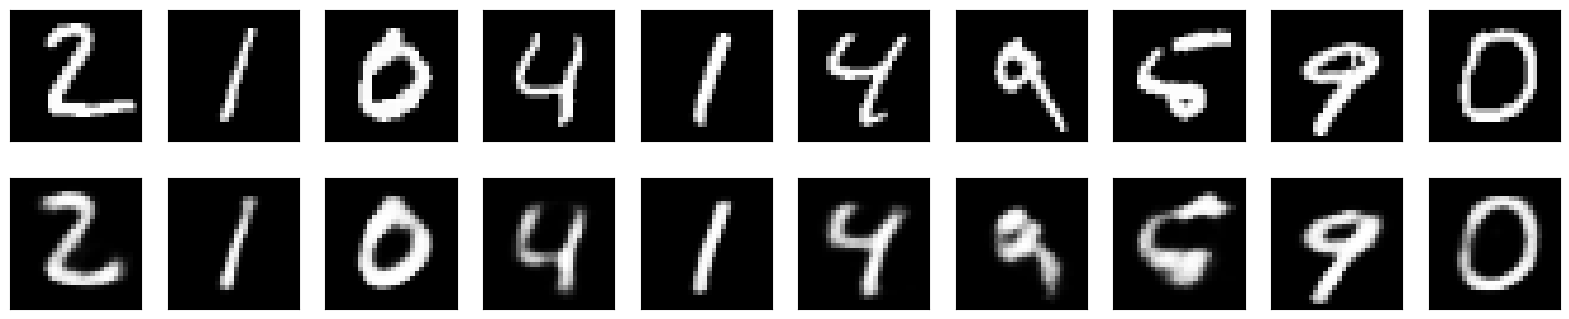

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoder model for 2D encoding


In [ ]:
#AutoEncoder model for 2D encoding
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(4, activation='relu')(encoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [ ]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36  

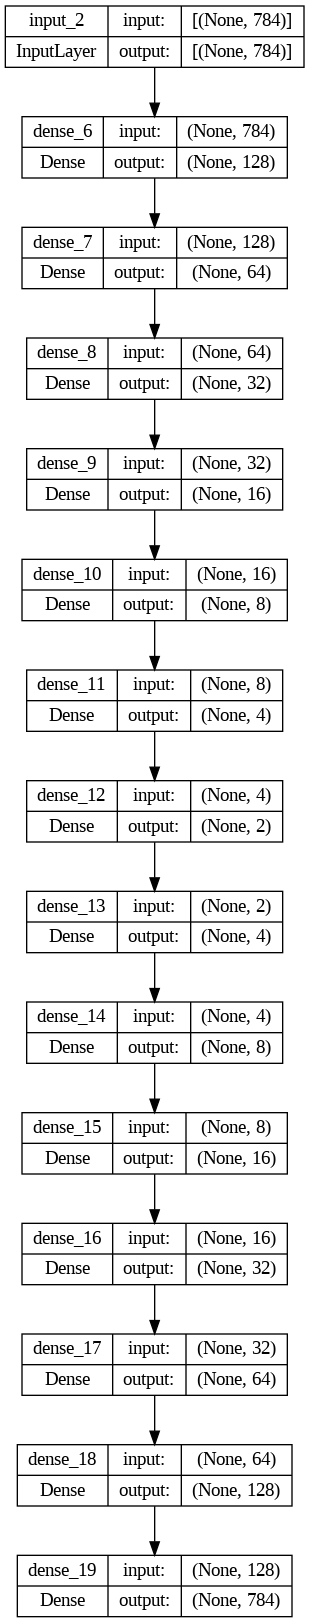

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 8ms/step - loss: 0.3483 - val_loss: 0.2397
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2376 - val_loss: 0.2350
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2334 - val_loss: 0.2298
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2290 - val_loss: 0.2266
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2262 - val_loss: 0.2238
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2226 - val_loss: 0.2205
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2197 - val_loss: 0.2184
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2172 - val_loss: 0.2164
Epoch 9/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2154 - val_loss: 0.2144
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2139 - val_l

313/313 [==============================] - 1s 2ms/step


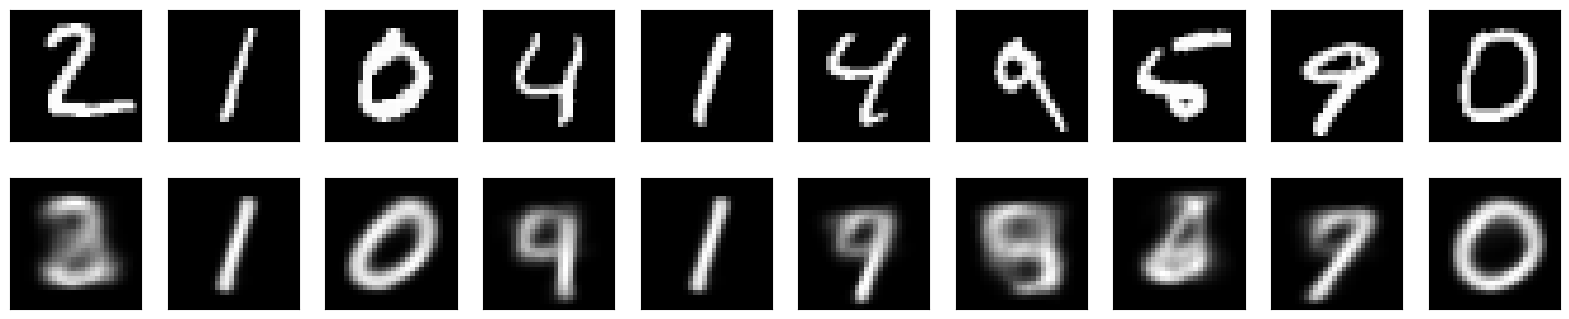

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### How to get the output of intermediate layer ?

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36  

We need the output of 8th layer

In [ ]:
model.layers

In [ ]:
model.layers[7].output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_12')>

Make a new model with
- input same as previous model and
- 7th layer output as model output (as layers starts from 0 )

In [ ]:
dim_2_model = keras.Model(model.input, model.layers[7].output)

#### Comparing results with tsne

In [ ]:
!pip install openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 61.8 MB/s eta 0:00:00


In [ ]:
from openTSNE import TSNE

In [ ]:
indices = np.random.choice(x_test.shape[0], 1000, replace = False)

In [ ]:
sample = x_test[indices]

In [ ]:
sample_y = y_test[indices]

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(sample)

CPU times: user 8.38 s, sys: 71.5 ms, total: 8.46 s
Wall time: 4.72 s


#### **Visualizing t-SNE results**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.husl_palette(len(np.unique(sample_y))))

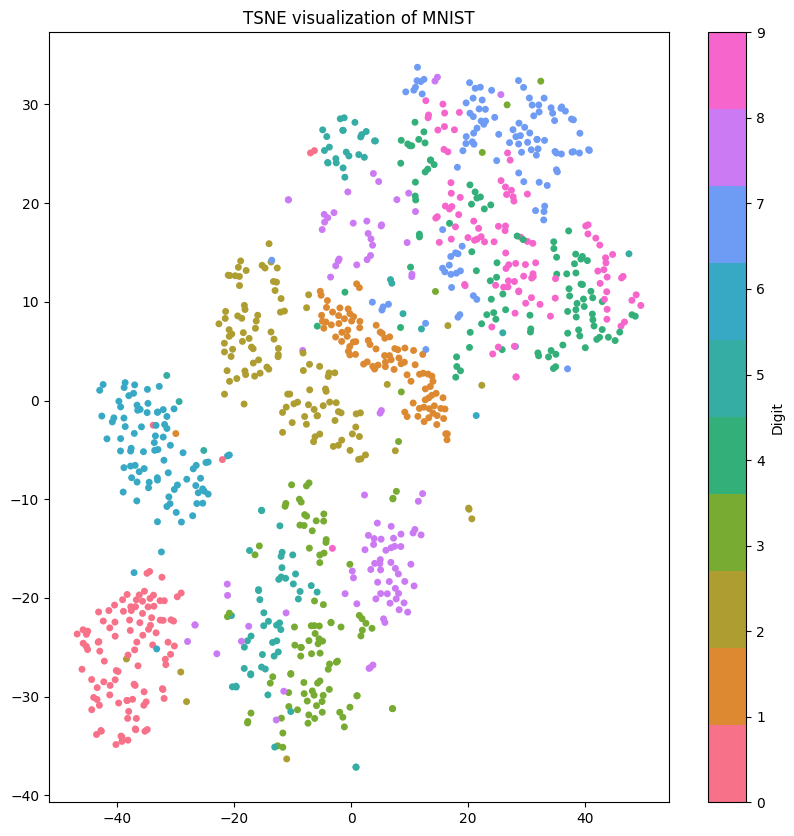

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### Visualizing AE results

In [ ]:
dim_2d = dim_2_model.predict(sample)

32/32 [==============================] - 0s 1ms/step


In [ ]:
dim_2d

array([[0.9812436 , 0.        ],
       [0.6268663 , 0.        ],
       [3.6355464 , 0.        ],
       ...,
       [3.392712  , 0.        ],
       [0.99806726, 0.        ],
       [1.2852949 , 0.        ]], dtype=float32)

In [ ]:
dim_2d.shape

(1000, 2)

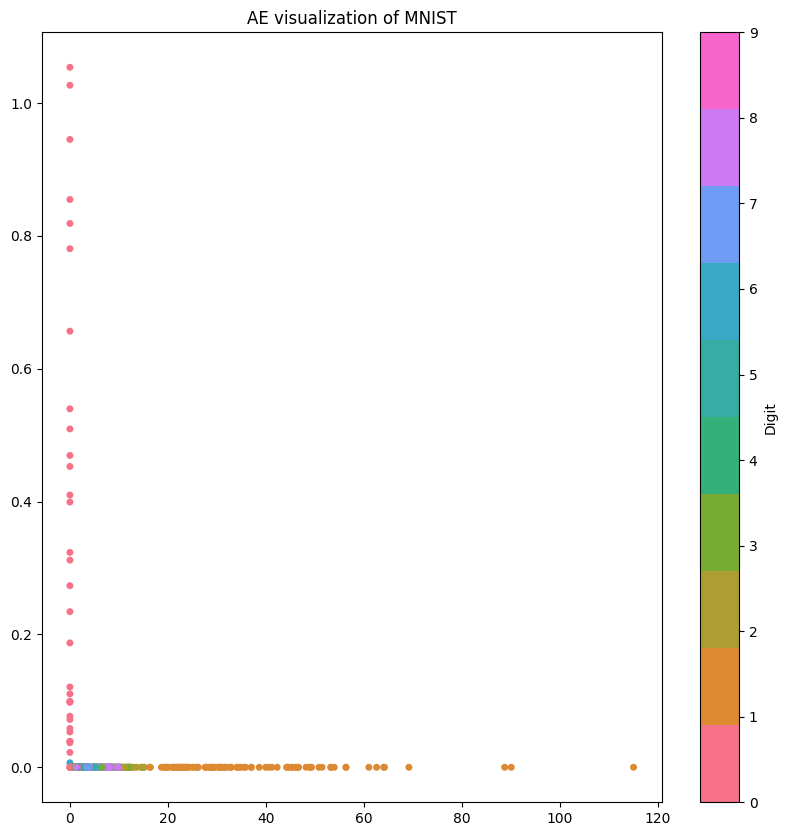

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('AE visualization of MNIST')

im = ax.scatter(dim_2d[:,0], dim_2d[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

Decoder deciphiers

## Feature Extraction and Transfer learning

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#add NOISE - adding noise with random normal distribution
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


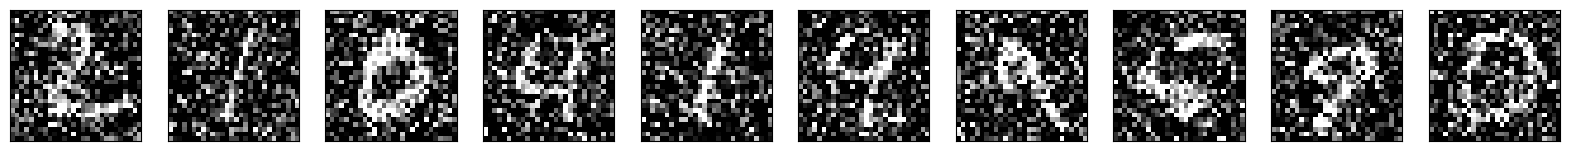

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.2702 - val_loss: 0.2120
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1893 - val_loss: 0.1747
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1683 - val_loss: 0.1604
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1577 - val_loss: 0.1545
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1518 - val_loss: 0.1484
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1470 - val_loss: 0.1446
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1430 - val_loss: 0.1404
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1396 - val_loss: 0.1379
Epoch 9/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1371 - val_loss: 0.1356
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1350 - v

313/313 [==============================] - 1s 3ms/step


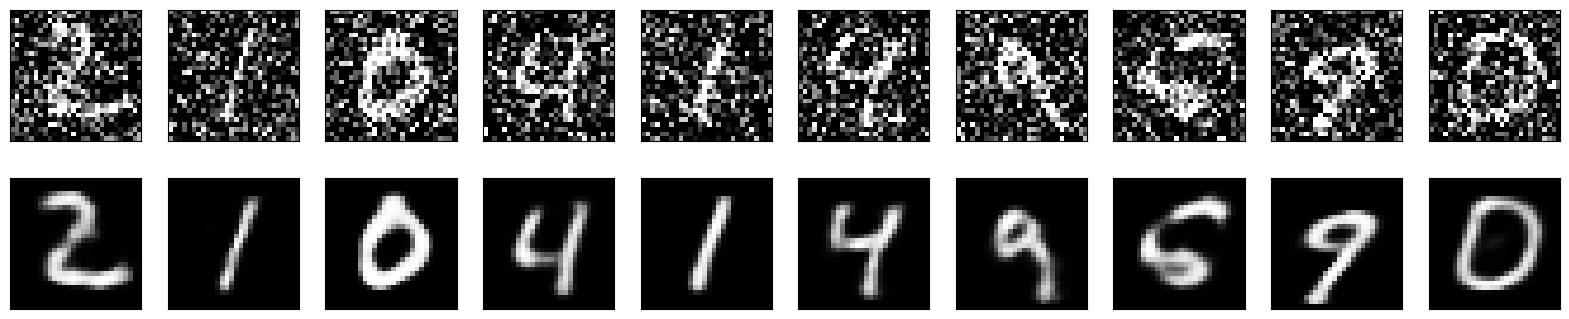

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Recommender System using AE

### Code walkthough

In [ ]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [ ]:
!gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
!gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

Downloading...
From: https://drive.google.com/uc?id=1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 191MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD
To: /content/movies.csv
100% 516k/516k [00:00<00:00, 175MB/s]


In [ ]:
ratings = pd.read_csv('ratings.csv')

#### What's the shape of ratings ?

In [ ]:
ratings.shape

(105339, 4)

#### How many unique movie ids do we have ?

In [ ]:
ratings.movieId.unique().shape

(10325,)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


#### Pivoting ratings table

Rows - Movie id

Columns = User id

In [ ]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [ ]:
rm.shape

(10325, 668)

#### Check the sparsity of data

In [ ]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

0.015272940801206305

- Only 1.5% of the values are filled


#### Splitting in train val

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val = train_test_split(rm, test_size = 0.2)

In [ ]:
X_train = train.values

In [ ]:
X_train.shape


(8260, 668)

In [ ]:
X_val = val.values

In [ ]:
X_val.shape

(2065, 668)

#### Training Auto Encoders

In [ ]:
import keras
from keras import layers

In [ ]:
input_movie = keras.Input(shape=(668,))
encoded = layers.Dense(512, activation='relu')(input_movie)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)


decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(668, activation='linear')(decoded)

In [ ]:
autoencoder = keras.Model(input_movie, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


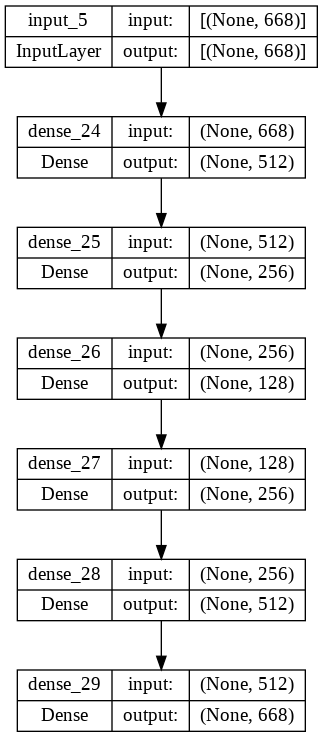

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 0.1706 - val_loss: 0.1495
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1466 - val_loss: 0.1352
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1344 - val_loss: 0.1266
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1247 - val_loss: 0.1209
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1179 - val_loss: 0.1154
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1109 - val_loss: 0.1115
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1053 - val_loss: 0.1084
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1012 - val_loss: 0.1063
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0966 - val_loss: 0.1034
Epoch 10/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0924 - val_loss: 0.1013
Epoch 11

#### Extracting embeddings

Let's check which layer returns the latent space embeddings

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 668)]             0         
                                                                 
 dense_24 (Dense)            (None, 512)               342528    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 dense_29 (Dense)            (None, 668)               3426

In [ ]:
autoencoder.layers[3].output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_26')>

Layer number 4 returns the latent space emebddings.

Let's create a model with
- input as model input and
- output as layer 4 output

In [ ]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)


#### Predicting embeddings for all movies

In [ ]:
embeddings = intermediate_model.predict(rm.values)

323/323 [==============================] - 1s 3ms/step


In [ ]:
embeddings

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3651494e+01,
        3.4803386e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1449605e-02, 0.0000000e+00, ..., 1.1319354e+00,
        1.9510438e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6276131e+00,
        4.5189867e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 9.5751397e-02, 0.0000000e+00, ..., 1.9680148e-01,
        4.0758547e-01, 0.0000000e+00],
       [0.0000000e+00, 1.6079006e+00, 0.0000000e+00, ..., 4.3769965e-01,
        3.3153665e-01, 0.0000000e+00],
       [0.0000000e+00, 8.8318728e-02, 0.0000000e+00, ..., 2.2562157e-01,
        5.4051644e-01, 0.0000000e+00]], dtype=float32)

In [ ]:
embeddings.shape

(10325, 128)

In [ ]:
embeddings[10]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9658452e+00,
       8.0590162e+00, 0.0000000e+00, 3.7221227e+00, 0.0000000e+00,
       1.0226821e+01, 8.1159992e+00, 0.0000000e+00, 1.8327374e+00,
       0.0000000e+00, 8.2238665e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 5.6204233e+00, 3.0633299e+00,
       0.0000000e+00, 7.0646725e+00, 0.0000000e+00, 2.7049942e+00,
       0.0000000e+00, 5.9217091e+00, 4.7638183e+00, 0.0000000e+00,
       6.8396516e+00, 4.1846232e+00, 3.0754751e-01, 0.0000000e+00,
       3.5070825e-01, 2.7261753e+00, 4.8433380e+00, 4.4773763e-01,
       0.0000000e+00, 0.0000000e+00, 1.5257427e+00, 0.0000000e+00,
       0.0000000e+00, 8.0603523e+00, 0.0000000e+00, 2.1496911e+00,
       3.4151089e+00, 2.9382644e+00, 1.4833727e+01, 0.0000000e+00,
       0.0000000e+00, 7.4706016e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 5.9207544e+00, 2.4117902e-03,
       6.5173354e+00, 1.0831287e+01, 0.0000000e+00, 0.0000000e

#### Finding similar movies - Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
similarity_matrix.shape

(10325, 10325)

In [ ]:
similarity_matrix

array([[1.0000001 , 0.6585631 , 0.67322814, ..., 0.59645236, 0.5442955 ,
        0.5833119 ],
       [0.6585631 , 0.9999999 , 0.6800547 , ..., 0.72579706, 0.6547908 ,
        0.72038335],
       [0.67322814, 0.6800547 , 0.99999964, ..., 0.68437904, 0.64143527,
        0.6798124 ],
       ...,
       [0.59645236, 0.72579706, 0.68437904, ..., 0.9999999 , 0.77266556,
        0.99907935],
       [0.5442955 , 0.6547908 , 0.64143527, ..., 0.77266556, 0.99999994,
        0.7622129 ],
       [0.5833119 , 0.72038335, 0.6798124 , ..., 0.99907935, 0.7622129 ,
        1.0000001 ]], dtype=float32)

#### Creating df for the similarity matrix

In [ ]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.658563,0.673228,0.540021,0.648697,0.654453,0.684952,0.632444,0.610780,0.654408,...,0.571254,0.589064,0.581250,0.618699,0.550565,0.553673,0.570174,0.596452,0.544295,0.583312
2,0.658563,1.000000,0.680055,0.664267,0.671681,0.682655,0.687399,0.736932,0.620380,0.721273,...,0.682567,0.722754,0.673074,0.735291,0.709819,0.600205,0.609749,0.725797,0.654791,0.720383
3,0.673228,0.680055,1.000000,0.708798,0.811759,0.733264,0.744269,0.749439,0.778765,0.572502,...,0.666188,0.681853,0.664915,0.694079,0.674888,0.702747,0.707777,0.684379,0.641435,0.679812
4,0.540021,0.664267,0.708798,1.000000,0.618423,0.682824,0.693533,0.851051,0.724973,0.665865,...,0.695002,0.742990,0.726576,0.756891,0.722054,0.685661,0.689927,0.746041,0.719017,0.740609
5,0.648697,0.671681,0.811759,0.618423,1.000000,0.671731,0.777911,0.699758,0.702049,0.590483,...,0.622101,0.651532,0.596869,0.659810,0.634000,0.613933,0.619347,0.653561,0.596539,0.649576


#### Finding movies similar to Liar Liar

In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
movies[movies.title.str.contains('Liar Liar')]

,movieId,title,genres
1202,1485,Liar Liar (1997),Comedy


#### Sorting the movie id by similarity score

In [ ]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

movieId
1485    1.000000
1391    0.829599
104     0.816998
1760    0.815274
1608    0.812336
3033    0.810485
1407    0.809809
1461    0.808078
1020    0.806623
1777    0.803359
Name: 1485, dtype: float32

#### Fetching the index of moives

In [ ]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index

#### Fetching the name of movies

In [ ]:
movies[movies.movieId.isin(movie_index)]

,movieId,title,genres
94,104,Happy Gilmore (1996),Comedy
828,1020,Cool Runnings (1993),Comedy
1130,1391,Mars Attacks! (1996),Action|Comedy|Sci-Fi
1143,1407,Scream (1996),Comedy|Horror|Mystery|Thriller
1184,1461,Vegas Vacation (National Lampoon's Las Vegas V...,Comedy
1202,1485,Liar Liar (1997),Comedy
1287,1608,Air Force One (1997),Action|Thriller
1390,1760,Spice World (1997),Comedy
1398,1777,"Wedding Singer, The (1998)",Comedy|Romance
2423,3033,Spaceballs (1987),Comedy|Sci-Fi


#Business Case


**Axis** bank is trying to categorize its customers for better advertising their Credit Card Service and have more number of customers rolling for the service
- You are a data scientist there, who has to classify the customers based on their expentidures, family size, age, marital status

<br>

Lets load the data !

In [ ]:
!gdown 1wKmz9mcng9dBsILIhhdwkoWg5_BhVhe6

Downloading...
From: https://drive.google.com/uc?id=1wKmz9mcng9dBsILIhhdwkoWg5_BhVhe6
To: /content/customer_train.csv
100% 425k/425k [00:00<00:00, 5.47MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of the Customer|
|02| **Gender** | Customer is a Male or Female |
|03|**Ever_Married**|Customer is married or not |
|04|**Age**|Age of the Customer|
|05|**Graduated**|Customer has graduated or not|
|06|**Profession**|Profession of Customer|
|07|**Work_Experience**|Work Exp of Customer, ranges from (0-14) |
|08|**Spending_Score**| Customer Expenditure scores |
|09|**Family_Size**|Family size of the Customer, ranges from (1-9)|
|10|**Var_1**|Categorizing Customers as (Cat_1,Cat_2,Cat_3,Cat_4)|
|11|**Segmentation**|Categorizing Customers as (A,B,C,D)|





**Note:** Profession of Customer includes :

- Artist, Doctor, Engineer, Entertainment, Executive, Healthcare , Homemaker , Lawyer , Marketing

In [ ]:
df = pd.read_csv('customer_train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**observe**

Since Segmentation and Var_1 says the same thing, we can drop either one of them:
- Dropping Var_1
- Also Dropping ID

In [ ]:
df.drop(columns=['Var_1','ID'],inplace = True)

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


**Observe**

There are Null values in the data

Dropping all the null values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

With all the null values removed, lets check the shape of the dataset

Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 6718 | 9 |

In [ ]:
df.shape

(6718, 9)

# EDA

Lets check all the **categorical data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


**observe**

All the Categorical features include:
- Gender, Ever_Married, Graduated, Profession, Spending_Score, Segmentation

<br>

#### Which Encoding to use for our target variable  ```Segmentation``` ?
Ans: Since its a Multi-Class Classification data:
- We will be using ```CategoricalCrossentropy``` as our loss
- Hence the Target variable is to be ```OneHot```Encoded

<br>

Lets Implement OneHot Encoding on our Target Variable



In [ ]:
#storing class label
Y = df['Segmentation']
df = pd.get_dummies(df, columns = ['Segmentation'])

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0,0,0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0,1,0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1,0,0
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0,0,1,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0,0,1,0


#### How to encode the remaining Categorical features ?
Ans: We can apply any Encoding Stratergy:
- Here we will apply ```OneHot Encoding```

<br>

Lets Encode  all the **Categorical data** to  ```OneHot Encoding``` matrix

In [ ]:
X = df.drop(columns=['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'])

y = df[['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D']]

In [ ]:
X = pd.get_dummies(X, columns = ['Gender','Ever_Married','Graduated', 'Profession','Spending_Score'])

X.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


Lets Split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (5441, 21) (5441, 4)
Validation: (605, 21) (605, 4)
Test  :  (672, 21) (672, 4)


**Observe**

We use 10% of the data as test and validation set respectively
- The remaining data is used for train

Also recall from Hyperparameter tuning lecture:
-  The importance of standardization as it helps
- the model to reach global minima faster

<br>

Lets implement the standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Baseline Model

Now that we have the data ready,
- Lets create a simple 6 layered base model


|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 64 Neurons|
|**L3**| |Contains 32 Neurons|
|**L4**| |Contains 16 Neurons|
|**L5**| |Contains 8 Neurons |
|**L6**| |Is the Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(4,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```Adam``` as Optimizer, and metrices as Precision and Recall
- Since Accuracy is not the right metric in Multi-Class setting  

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['Precision','Recall']  )


Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 4s 13ms/step - loss: 1.3399 - precision: 0.8319 - recall: 0.0182 - val_loss: 1.2726 - val_precision: 0.7162 - val_recall: 0.0876
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.2237 - precision: 0.7263 - recall: 0.1336 - val_loss: 1.1775 - val_precision: 0.6727 - val_recall: 0.1223
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 1.1491 - precision: 0.7065 - recall: 0.2182 - val_loss: 1.1193 - val_precision: 0.6813 - val_recall: 0.2826
Epoch 4/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0931 - precision: 0.6887 - recall: 0.3025 - val_loss: 1.0890 - val_precision: 0.7143 - val_recall: 0.2893
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0673 - precision: 0.6827 - recall: 0.3231 - val_loss: 1.0751 - val_precision: 0.6889 - val_recall: 0.3074
Epoch 6/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0546 - precision: 0.6747 

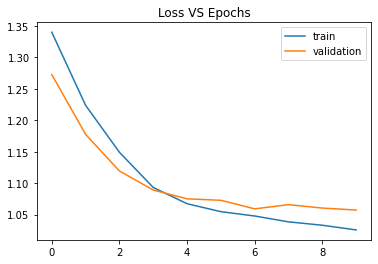

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



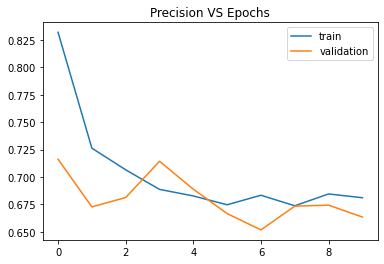

In [ ]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]


plt.plot(epochs, precision, label="train")
plt.plot(epochs, val_precision, label="validation")

plt.legend()
plt.title("Precision VS Epochs")

plt.show()



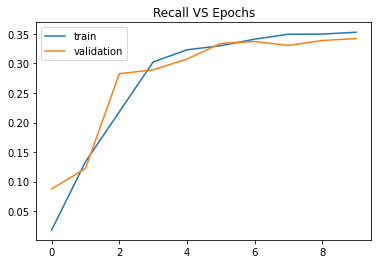

In [ ]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]


plt.plot(epochs, recall, label="train")
plt.plot(epochs, val_recall, label="validation")

plt.legend()
plt.title("Recall VS Epochs")

plt.show()



**Observe**

After 10 epochs:
- the model still having a high loss
- Along with that Precision is 68 %

The only thing the model improved upon:
- Is on the Recall which reached 35 %




#Orthogonalization

Now that we understand importance of a single Evaluation Metrics
- Lets implement F1 Score

**Note**: Keras does not have F1 score as metric

<br>

Therefore we will be using [Tensorflow's addons](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score) for F1

In [ ]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.6 MB/s 


In [ ]:
import tensorflow_addons as tfa


Using F1 score as metrics

**Note:**

- The micro-averaged F1 score pools per-sample classifications across classes, and then calculates the overall F1 score.

- The macro-averaged F1 score computes a simple average of the F1 scores over classes.

<br>

Hence we want per-sample classification across all classes, hence using micro-averaged F1Score

In [ ]:
model = create_baseline()

f1 = tfa.metrics.F1Score(4,'micro')

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[f1]  )


training model for 10 epochs with batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 1s 9ms/step - loss: 1.3087 - f1_score: 0.3721 - val_loss: 1.2346 - val_f1_score: 0.3917
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1930 - f1_score: 0.4367 - val_loss: 1.1576 - val_f1_score: 0.4678
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1337 - f1_score: 0.5207 - val_loss: 1.1073 - val_f1_score: 0.5157
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0984 - f1_score: 0.5315 - val_loss: 1.0940 - val_f1_score: 0.5058
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0752 - f1_score: 0.5381 - val_loss: 1.0825 - val_f1_score: 0.5041
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0633 - f1_score: 0.5391 - val_loss: 1.0690 - val_f1_score: 0.5339
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0536 - f1_score: 0.5464 - val_loss: 1.0569 - val_f1_score: 0.5223
Epoch 8/10
43/43 [==

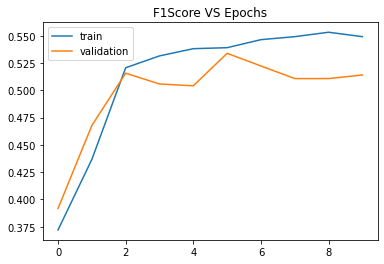

In [ ]:
epochs = history.epoch
f1_score = history.history["f1_score"]
val_f1_score = history.history["val_f1_score"]


plt.plot(epochs, f1_score, label="train")
plt.plot(epochs, val_f1_score, label="validation")

plt.legend()
plt.title("F1Score VS Epochs")

plt.show()



**Observe**

Just by using F1Score, we can better understand that
- the model performance much clearly




<br>

With this lets check the performance of the model on the test data


In [ ]:
import sklearn

from sklearn.metrics import f1_score

In [ ]:
y_pred = model.predict(X_test)

# y_test was One hot Encoded , y_pred had probabilities,
# Hence converting them to labels for MultiClass F1 Calculation
f1_score(np.argmax(y_test.values,axis=1),np.argmax(y_pred,axis=1),average='micro')

21/21 [==============================] - 0s 2ms/step


0.5089285714285714

**Observe**

The model has similar results to Validation dataset
- Because of the fact, the distribution of Validation and Test data is same

<br>

Imagine if the validation data had indian customers information
-  while test data had UK Customers information

#### Can we now rely on the results of Test and validation set ?

Ans: No, Clearly because:
- The people in India and UK live in completely different scenarios
- Meaning the distribution for both the test and validation set becomes entirely different

<br>

#### How to make the distribution same in test and validation set ?
One hack here:
- Is to make sure to have samples of UK in the validation data and Indian samples in test data





# LIME: Code Implementation

Let's understand more about LIME by looking at a real-time example! We shall use Fashion MNIST for predicting the category of an apparel.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset
- **Fashion MNIST** is a set of Zalando's article images and take about 70,000 such images of 28x28 pixels as our dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Training data
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)

# Testing data
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


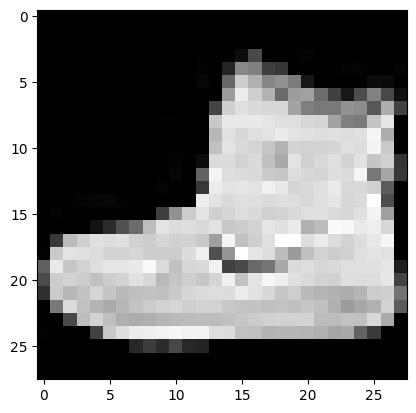

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap='gray', vmin=0, vmax=255)
plt.grid(False)

- Even though we find that the images are blurry, we can still make out the type of apparel (shoe) from the figure. Let's see how good a simple Neural Network is in doing so!

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- Neural Networks are usually not good at dealing with large integers. So, we rescale the image pixels to be in the range [0, 1]. Note that this is a standard technique while dealing with pixels in Machine Learning

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

- Let's have a look at a number of demo images to see what various apparels in the dataset look like!

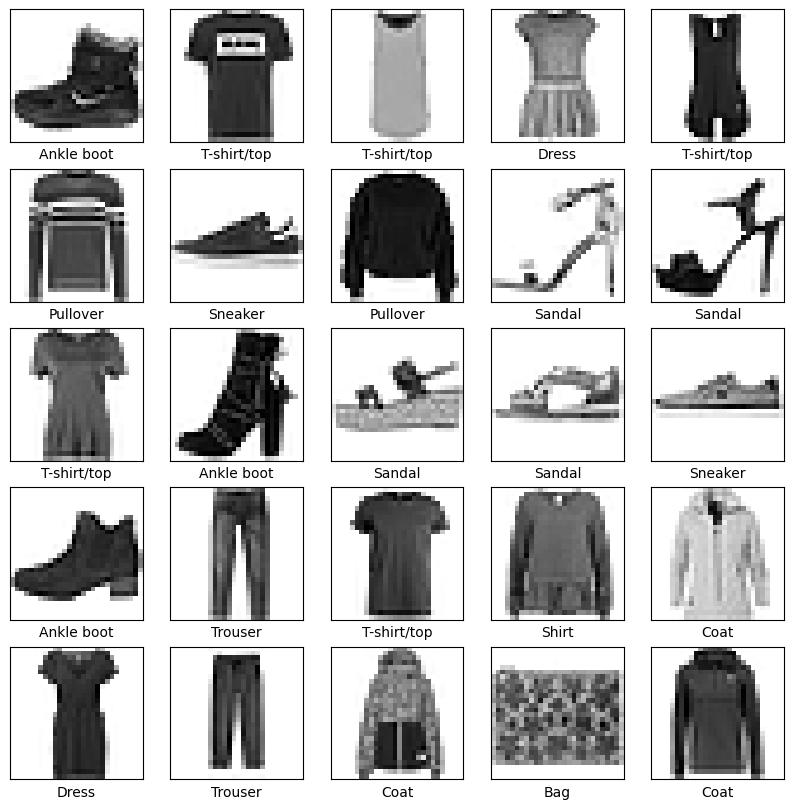

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])

### Let's build a model!
- Before we go ahead and understand how we interpret a model, we need to train a model. Let's build a simplistic classifier, train it and evaluate it's performance on our dataset


In [ ]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_1.summary()


model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Time to tinker around with LIME!
Let's start by installing LIME and selecting a localized image

## How does LIME work?
We start with selecting an image from a particular locality. A locality usually represents a single data point. In our case, this data point, in our case is an image!

Once this is done, we do the following:
- Data Perturbation: Create modified instances from locality by randomly changing features while keeping the label unchanged.

- Model Prediction: Pass the perturbed instances through the black-box model and record the predictions.

- Feature Extraction: Extract relevant features from the perturbed instances and encode them appropriately.

- Local Model Fitting: Build a simpler, interpretable model (explainer model) to approximate the black-box model's behavior locally.

- Weights Calculation: Assign weights to the perturbed instances based on their proximity to the instance of interest.

- Explanations Generation: Combine the predictions of the explainer model with feature importance to generate explanations.

The explanations highlight the most influential features for the black-box model's prediction on a specific instance, providing insights into the decision-making process. LIME offers local explanations and helps understand complex and opaque models.

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3b4f12df5519c510aceb2b08c09abaa36ef1f088a6ec2bee2d4bf467a98118e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### Let's now select a localized data point

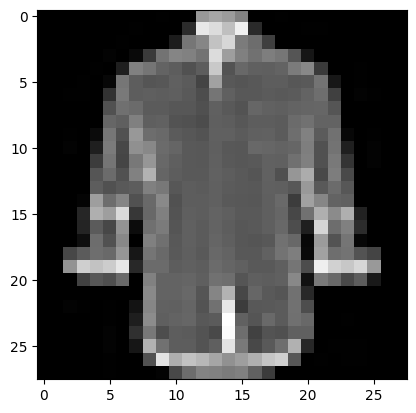

1/1 [==============================] - 0s 140ms/step
Predicted label: Dress, Actual label: Shirt


In [ ]:
idx = 2708 #this is my Xq

img = test_images[idx][np.newaxis, :, :]
actual_label = test_labels[idx]

plt.figure()
plt.imshow(img[0], cmap='gray')
plt.show()

#print(output_vector)
#
output_vector = model_1.predict(img)
print(f"Predicted label: {class_names[np.argmax(output_vector)]}, Actual label: {class_names[actual_label]}")

### Model interpretability with LIME
- Let's start with implementing an end-to-end interpretability algorithm with LIME

In [ ]:
from lime import lime_image #since image is the input, you have lime_text as well
from lime.wrappers.scikit_image import SegmentationAlgorithm #This is my interpretable model (As discussed in step 4)

explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [ ]:
#Since Lime works with RBG only, We need to find a way for conversion
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images
img2 = gray2rgb(img[0])
print(img2.shape)

(28, 28, 3)


In [ ]:
def predict_on_color(img):
  global model_1
  gray_img = rgb2gray(img)
  return model_1.predict(gray_img, verbose = 0)

In [ ]:
%%time
explanation = explainer.explain_instance(img2,
    classifier_fn = predict_on_color,
    top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 1min 7s, sys: 1.63 s, total: 1min 8s
Wall time: 1min 18s


Text(0.5, 1.0, 'Positive/Negative Regions for Shirt')

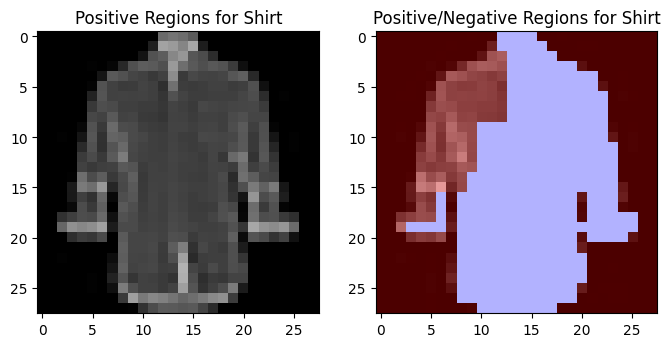

In [ ]:
temp, mask = explanation.get_image_and_mask(test_labels[idx], positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))

ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')

ax1.set_title('Positive Regions for {}'.format(class_names[test_labels[idx]]))

temp, mask = explanation.get_image_and_mask(test_labels[idx], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)

ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')

ax2.set_title('Positive/Negative Regions for {}'.format(class_names[test_labels[idx]]))

**observe**

For the image in right
- the red regions denotes the vulnerable points of model
- Meaning on creating noises in these regions, the model misclassifies

### What is happening in this code?
LIME provides 2 unique interfaces:
- **Segmenter**: A segmenter is responsible for dividing an instance (in our case, an image) into subregions. This allows us to detect which part of our input is most influential.
- **Explainer**: The explainer in LIME is a simpler and interpretable model that is trained to approximate the behavior of the black-box model in the local neighborhood of the instance being explained.

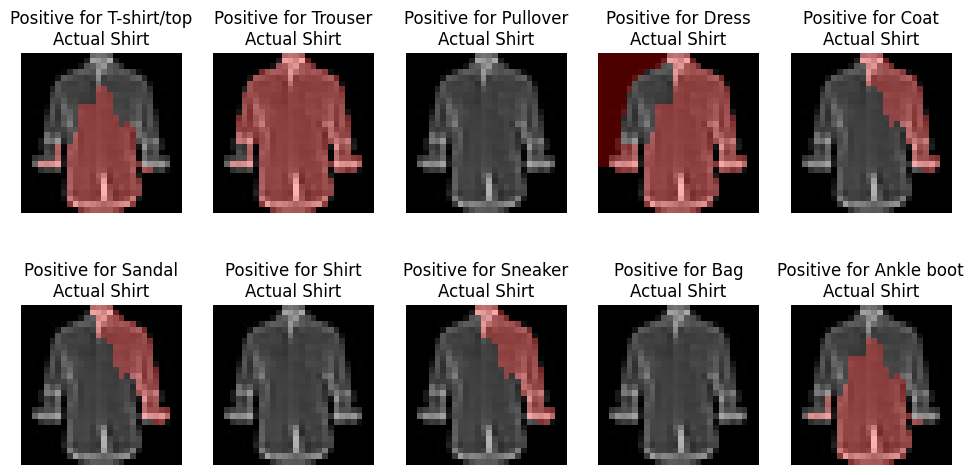

In [ ]:
# now for each class we are adding noise and checking where the model could have mis-interpretted
#what should we change in our iage that instead of predictiong Shirt it starts predicting T shirt/ top etc
#Red are those regions in which if I start adding noise it will go from Actual (shirt) to a particular class (T-shirt)
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,img2, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(class_names[i], class_names[test_labels[idx]]))
    c_ax.axis('off')

**observe**
- the red regions shows the locality of points where on creating noises causes the model to misclassify
- Notice for Actual Shirt, Bag and Pullover we do not have a red region
 - meaning that for these classes, the model predicts absolutely correctly

### Understanding SHAP
like with LIME, let's start with building an end-to-end algorithm and understand what's going on in there!

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer: 3it [00:39, 19.65s/it]


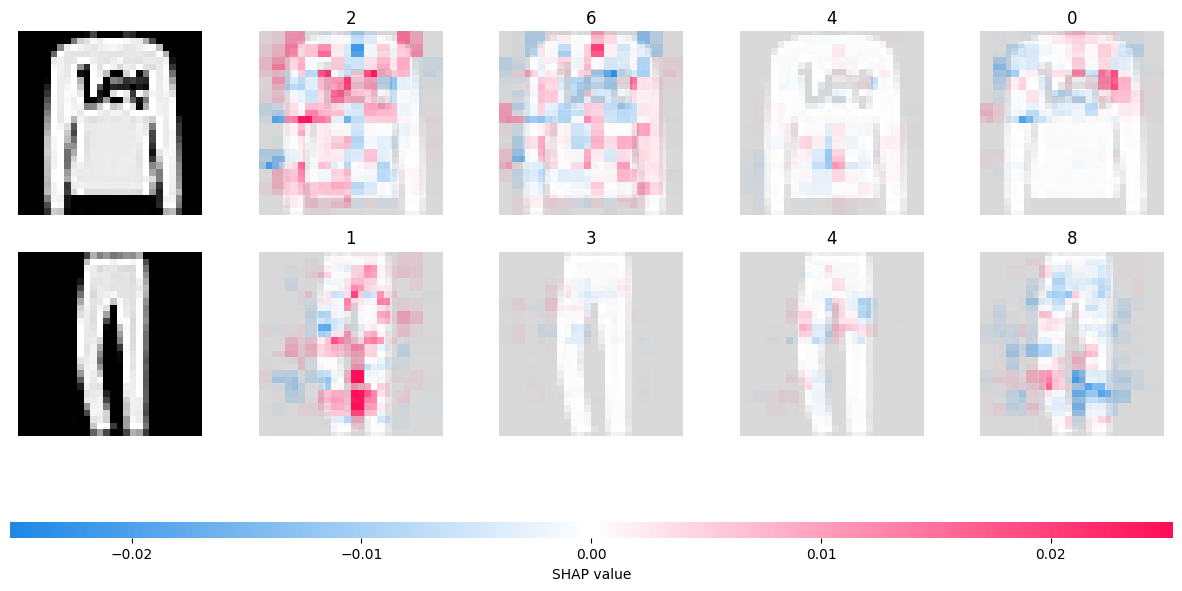

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import shap
from PIL import Image

# Load the FashionMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Define the custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Python function to get model output; replace this function with your own model function
def predict(img: np.ndarray) -> np.ndarray:
    return model.predict(img, verbose = 0)

# Check that predictions work correctly
out = predict(X_test[1:3])
classes = np.argmax(out, axis=1)
print(f'Classes: {classes}')

# Prepare data transformation pipeline
mean = [0.5]
std = [0.5]

def transform_fn(x: np.ndarray) -> np.ndarray:
    return (x - mean) / std

def inv_transform_fn(x: np.ndarray) -> np.ndarray:
    return (x * std) + mean

# Define a masker that is used to mask out partitions of the input image
masker_blur = shap.maskers.Image("blur(128,128)", X_train[0].shape)

# Create an explainer with the model and image masker
explainer = shap.Explainer(predict, masker_blur, output_names=[str(i) for i in range(10)])

# Here we explain two images using 10000 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X_test[1:3], max_evals=10000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

# Reshape and inverse transform the SHAP values and data
shap_values.data = inv_transform_fn(shap_values.data)
shap_values.values = [val for val in np.moveaxis(shap_values.values,-1, 0)]

# Plot the SHAP values
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names)


### SHAP Algorithm
- In order To calculate SHAP (SHapley Additive exPlanations) values, we do the following:
- Choose a reference point as a baseline for feature contribution measurement.
- Explore all feature permutations for a specific instance.
- Evaluate each feature's contribution by comparing predictions with and without the feature.
- Apply the Shapley value formula to calculate feature importance.
- Interpret positive/negative SHAP values as positive/negative contributions.

SHAP values offer a comprehensive way to understand feature importance, accounting for interactions and dependencies, aiding interpretation of complex models.

### Conclusion
- We have explored LIME and SHAP, two of the most popular techniques for model interpretability.
- We found that model interpretablity can be an effective tool for transparancy, debugging and bias mitigation in Neural Network architectures!